In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import sys
sys.path.append('../')
from wrappers.bioc_wrapper import bioc_to_docs, bioc_to_relevances
from wrappers.pandas_wrapper import relevances_to_pandas, docs_to_pandasdocs
from mlearning.data_analysis import analysis_dataframe, plot_nmr_sentences, plot_word_count, plot_top_n_words
from mlearning.data_analysis import LSA_topic_modelling, corpus_visualization
from mlearning.data_analysis import plot_labels_balance, plot_words_per_sentence
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords

/home/malves/miniconda3/envs/biotmpygpu/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
[nltk_data] Downloading package stopwords to /home/malves/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
train_dataset_path = '../datasets/PMtask_Triage_TrainingSet.xml'
test_dataset_path = '../datasets/PMtask_Triage_TestSet.xml'

In [5]:
#stop_words = set(stopwords.words('english'))            #####
stop_words = None
lower = True               
remove_punctuation = False
split_by_hyphen = True
lemmatization = False           
stems = False                    

## Relevant Documents vs Nonrelevant Documents

In [6]:
docs_train = bioc_to_docs(train_dataset_path, stop_words=stop_words, lower=lower, remove_punctuation=remove_punctuation,
                            split_by_hyphen=split_by_hyphen, lemmatization=lemmatization, stems=stems)

relevances_train = bioc_to_relevances(train_dataset_path, 'protein-protein')


x_train_df = docs_to_pandasdocs(docs_train)
y_train_df = relevances_to_pandas(x_train_df, relevances_train)

In [7]:
train_dataanalysis_df = analysis_dataframe(x_train_df, y_train_df, dataset_name='prot_int_biocreative', set='train')

In [8]:
docs_test = bioc_to_docs(test_dataset_path, stop_words=stop_words, lower=lower, remove_punctuation=remove_punctuation,
                            split_by_hyphen=split_by_hyphen, lemmatization=lemmatization, stems=stems)

relevances_test = bioc_to_relevances(test_dataset_path, 'protein-protein')


x_test_df = docs_to_pandasdocs(docs_test)
y_test_df = relevances_to_pandas(x_test_df, relevances_test)

In [9]:
x_train_df['Document'][0].fulltext_string

'the molecular basis of rieger syndrome . analysis of pitx2 homeodomain protein activities . rieger syndrome is an autosomal - dominant developmental disorder that includes glaucoma and mild craniofacial dysmorphism in humans . mutations in the pitx2 homeobox gene have been linked to rieger syndrome . we have characterized wild type and mutant pitx2 activities using electrophoretic mobility shift assays , protein binding , and transient transfection assays . pitx2 preferentially binds the bicoid homeodomain binding site and transactivates reporter genes containing this site . the combination of pitx2 and another homeodomain protein , pit - 1 , yielded a synergistic 55 - fold activation of the prolactin promoter in transfection assays . addition of pit - 1 increased pitx2 binding to the bicoid element in electrophoretic mobility shift assays . furthermore , we demonstrate specific binding of pit - 1 to pitx2 in vitro . thus , wild type pitx2 dna binding activity is modulated by protein 

In [10]:
test_dataanalysis_df = analysis_dataframe(x_test_df, y_test_df, dataset_name='prot_int_biocreative', set='test')

### Train

##### With Stopwords

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


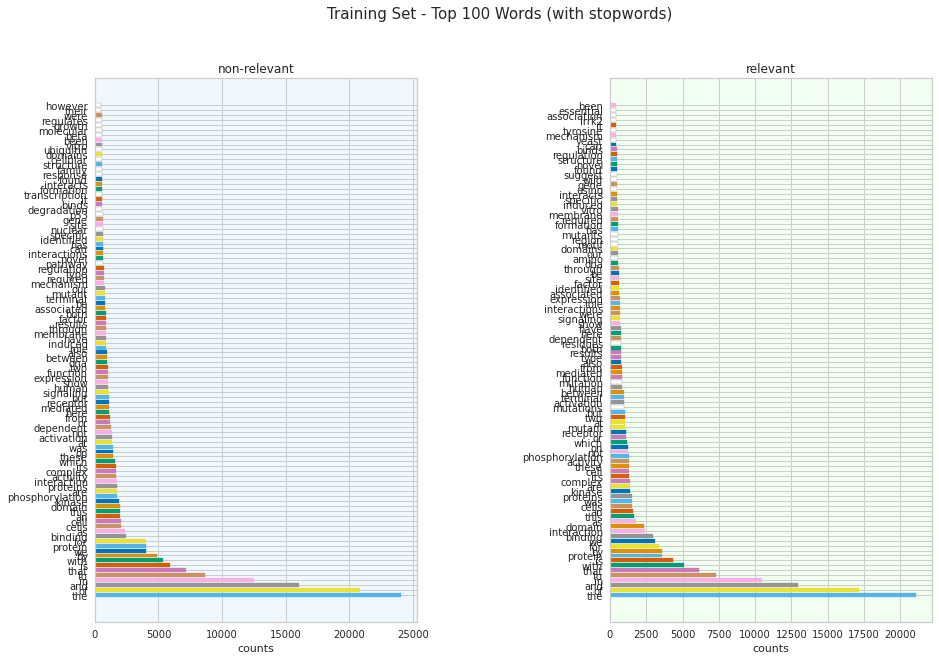

Unique words: 15 
 Non-Relevant: ['pathway' 'nuclear' 'p53' 'degradation' 'transcription' 'response'
 'family' 'cellular' 'ubiquitin' 'beta' 'molecular' 'growth' 'regulates'
 'their' 'however'] 
 Relevant: ['mutations' 'mutation' 'residues' 'amino' 'motif' 'region' 'mutants'
 'using' 'wild' 'suggest' 'yeast' 'tyrosine' 'lrrk2' 'association'
 'essential']


In [11]:
plot_top_n_words(train_dataanalysis_df, n = 100, title='Training Set - Top 100 Words (with stopwords)', fig_dim= (15,10));

##### Without Stopwords

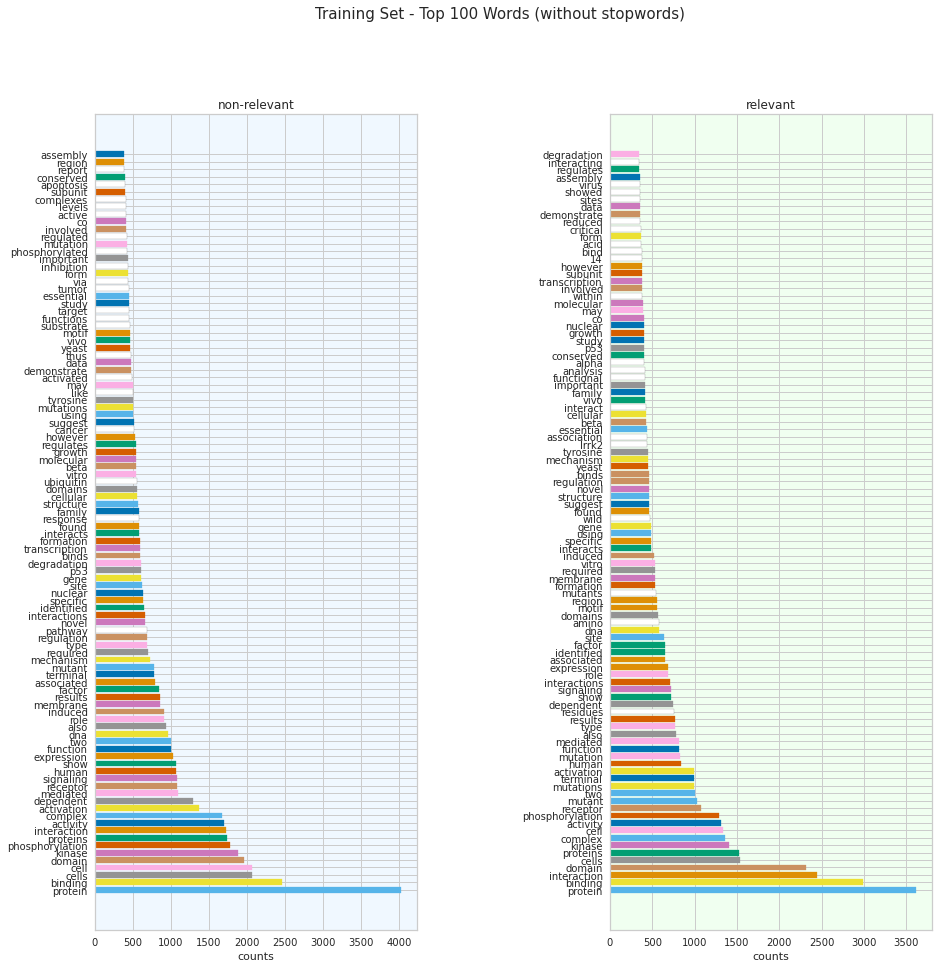

Unique words: 20 
 Non-Relevant: ['pathway' 'response' 'ubiquitin' 'cancer' 'like' 'activated' 'thus'
 'substrate' 'functions' 'target' 'tumor' 'via' 'inhibition'
 'phosphorylated' 'regulated' 'active' 'levels' 'complexes' 'apoptosis'
 'report'] 
 Relevant: ['residues' 'amino' 'mutants' 'wild' 'lrrk2' 'association' 'interact'
 'functional' 'analysis' 'alpha' 'within' '14' 'bind' 'acid' 'critical'
 'reduced' 'sites' 'showed' 'virus' 'interacting']


In [14]:
train_unique_nr, train_unique_r = plot_top_n_words(train_dataanalysis_df, n = 100, stop_words = set(stopwords.words('english')), title='Training Set - Top 100 Words (without stopwords)', fig_dim= (15,15), file_name='top_100_train.pdf')

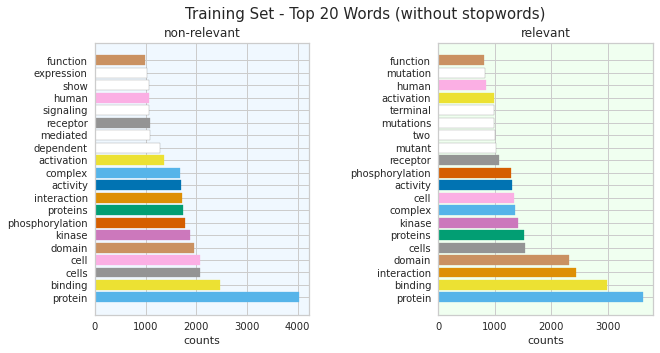

Unique words: 5 
 Non-Relevant: ['dependent' 'mediated' 'signaling' 'show' 'expression'] 
 Relevant: ['mutant' 'two' 'mutations' 'terminal' 'mutation']


In [15]:
train_unique_nr, train_unique_r = plot_top_n_words(train_dataanalysis_df, n = 20, stop_words = set(stopwords.words('english')), title='Training Set - Top 20 Words (without stopwords)', fig_dim= (10,5), file_name='train_20.pdf')

### Test

##### With Stopwords

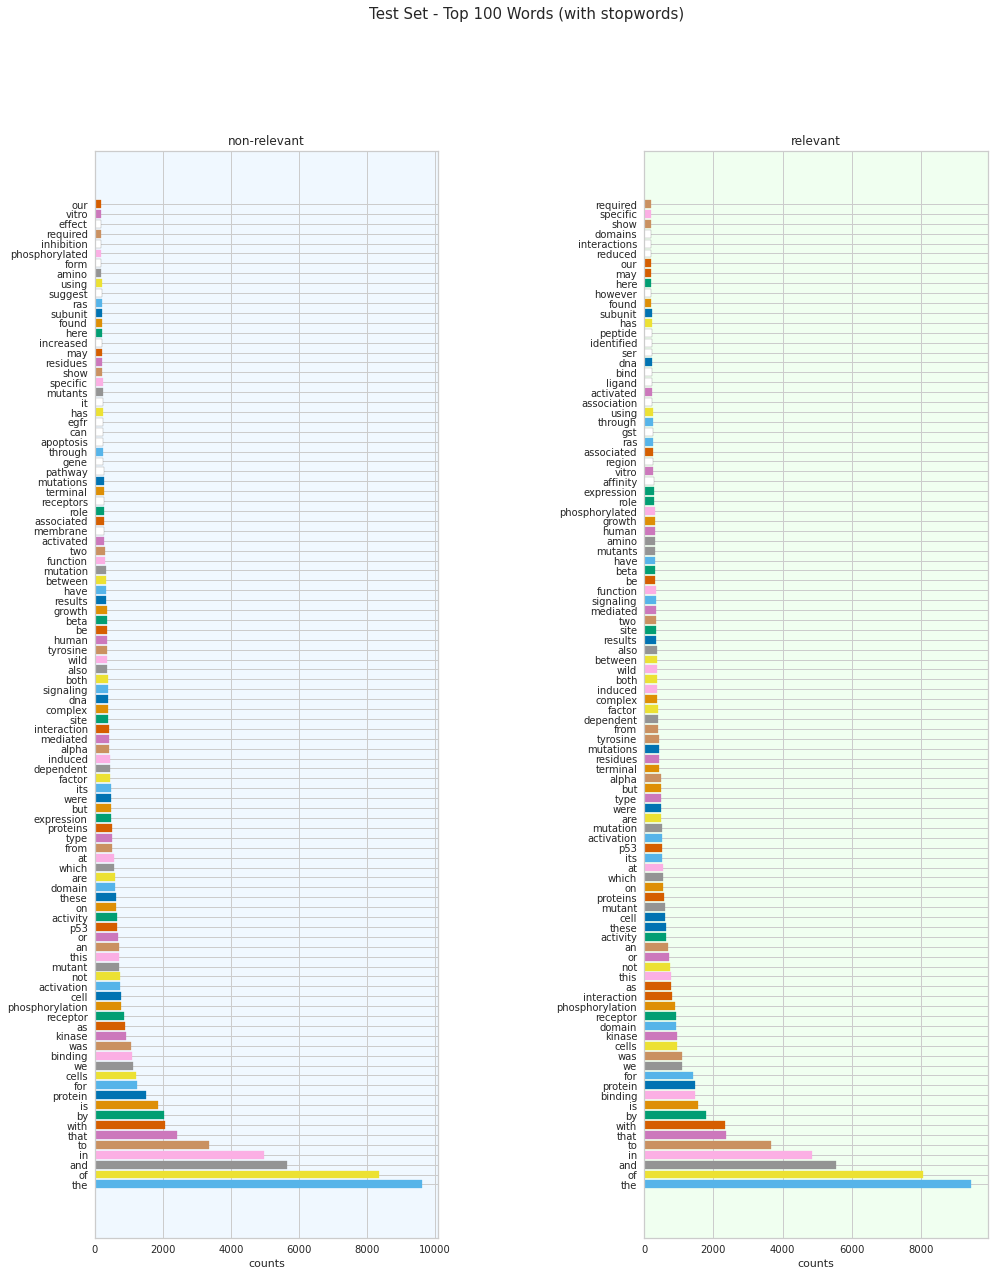

Unique words: 13 
 Non-Relevant: ['membrane' 'receptors' 'pathway' 'gene' 'apoptosis' 'can' 'egfr' 'it'
 'increased' 'suggest' 'form' 'inhibition' 'effect'] 
 Relevant: ['affinity' 'region' 'gst' 'association' 'ligand' 'bind' 'ser'
 'identified' 'peptide' 'however' 'reduced' 'interactions' 'domains']


In [16]:
plot_top_n_words(test_dataanalysis_df, n = 100, title='Test Set - Top 100 Words (with stopwords)', fig_dim= (16,20));

##### Without Stopwords

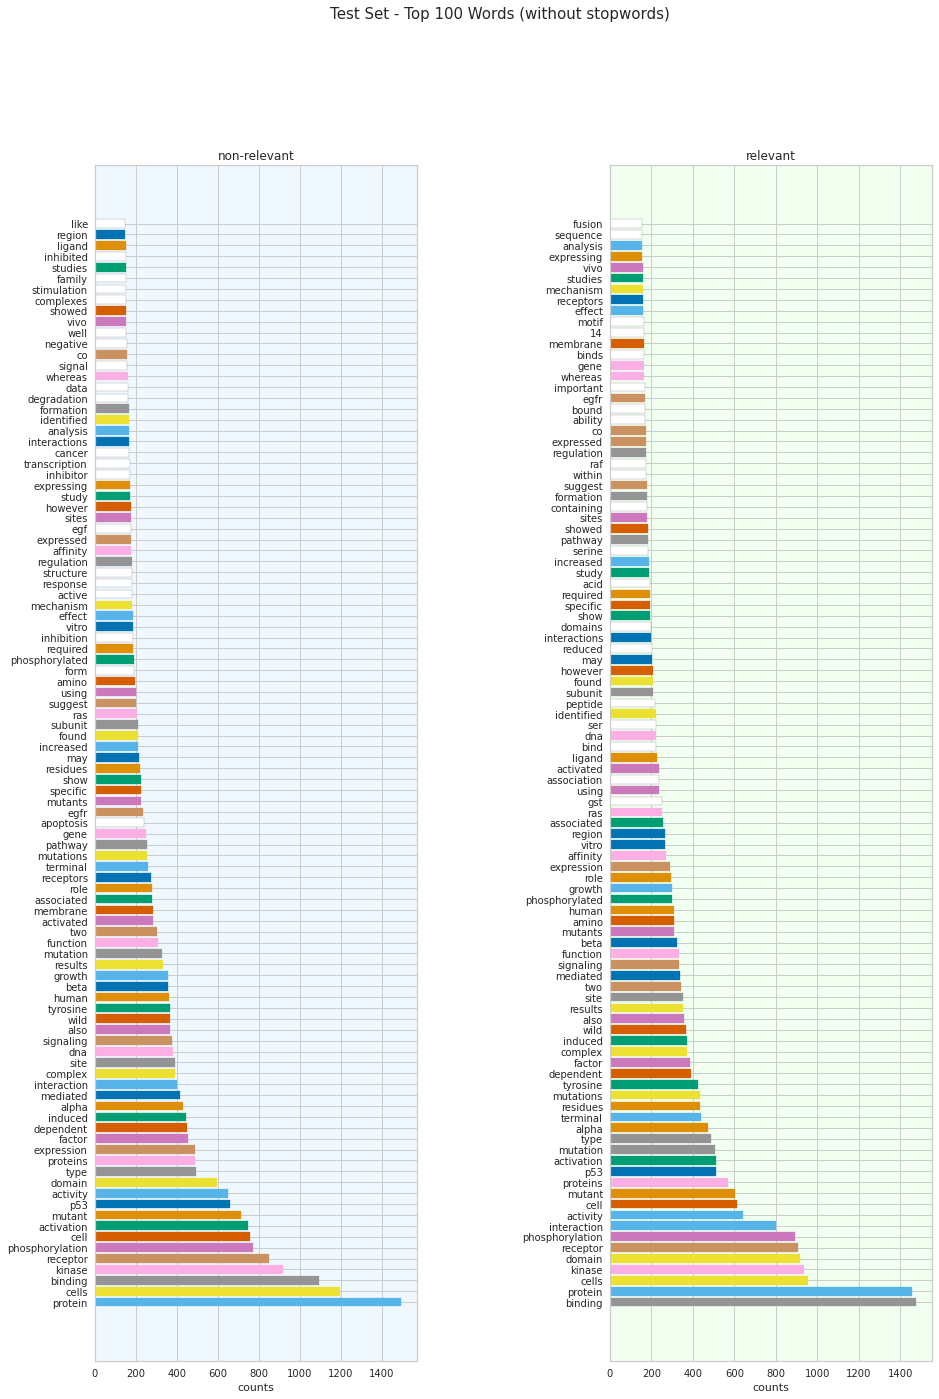

Unique words: 20 
 Non-Relevant: ['apoptosis' 'form' 'inhibition' 'active' 'response' 'structure' 'egf'
 'inhibitor' 'transcription' 'cancer' 'degradation' 'data' 'signal'
 'negative' 'well' 'complexes' 'stimulation' 'family' 'inhibited' 'like'] 
 Relevant: ['gst' 'association' 'bind' 'ser' 'peptide' 'reduced' 'domains' 'acid'
 'serine' 'containing' 'within' 'raf' 'ability' 'bound' 'important'
 'binds' '14' 'motif' 'sequence' 'fusion']


In [17]:
test_unique_nr, test_unique_r = plot_top_n_words(test_dataanalysis_df, n = 100, stop_words = set(stopwords.words('english')), title='Test Set - Top 100 Words (without stopwords)', fig_dim= (15,22), file_name='top_100_test.pdf')

In [18]:
nr_inter = set(train_unique_nr).intersection(test_unique_nr)
print(nr_inter)
print(len(nr_inter), len(train_unique_nr), len(test_unique_nr))

set()
0 5 20


In [19]:
r_inter = set(train_unique_r).intersection(test_unique_r)
print(r_inter)
print(len(r_inter), len(train_unique_r), len(test_unique_r))

set()
0 5 20


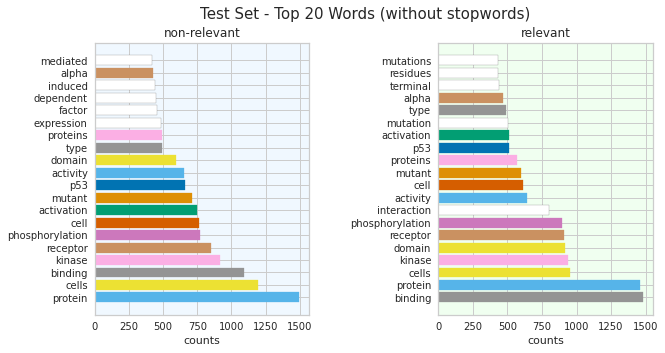

Unique words: 5 
 Non-Relevant: ['expression' 'factor' 'dependent' 'induced' 'mediated'] 
 Relevant: ['interaction' 'mutation' 'terminal' 'residues' 'mutations']


In [20]:
test_unique_nr, test_unique_r = plot_top_n_words(test_dataanalysis_df, file_name = 'test_20.pdf', n = 20, stop_words = set(stopwords.words('english')), title='Test Set - Top 20 Words (without stopwords)', fig_dim= (10,5))

## Word Count

### Train

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


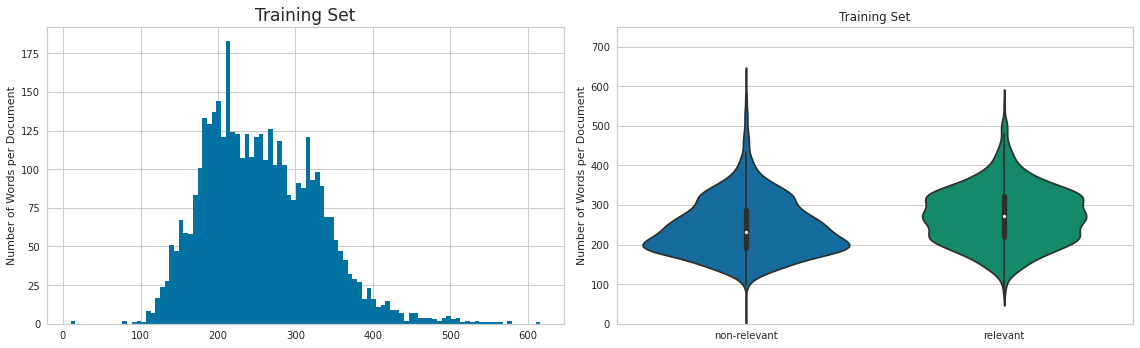

In [21]:
plot_word_count(train_dataanalysis_df, title = 'Training Set', y_lim=[0,750], filename='twd.pdf', xTitle='', yTitle='Number of Words per Document')

In [127]:
def plot_word_count(analysis_df, bins= 100, xTitle = 'Number of words per Document', yTitle = 'Number of documents', title='Word Count Distribution', filename = 'word_count', fig_dim=(16,5), y_lim=None, file_extension=None):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=fig_dim)
    fig.tight_layout()
    ax1.hist(analysis_df['word_count'], bins=bins)
    ax1.set_title(title, fontsize=17)
    ax2 = sns.violinplot(x="Label", y="word_count", data=analysis_df, palette=set_palette('colorblind'))
    ax1.set_xlabel(xTitle)
    ax1.set_ylabel(yTitle)
    ax2.set_xlabel(xTitle)
    ax2.set_ylabel(yTitle)
    ax2.set_title(title)
    ax2.set_title(title)
    ax2.set_ylim(y_lim)
    ax1.tick_params(axis='both',which='major', fontsize=13)
    ax2.tick_params(axis='both',which='major')
    plt.tight_layout()
    if not file_extension:
        plt.savefig(analysis_df.name + '/' + filename )
    else:
        plt.savefig(analysis_df.name + '/' + filename )
    plt.show()

### Test

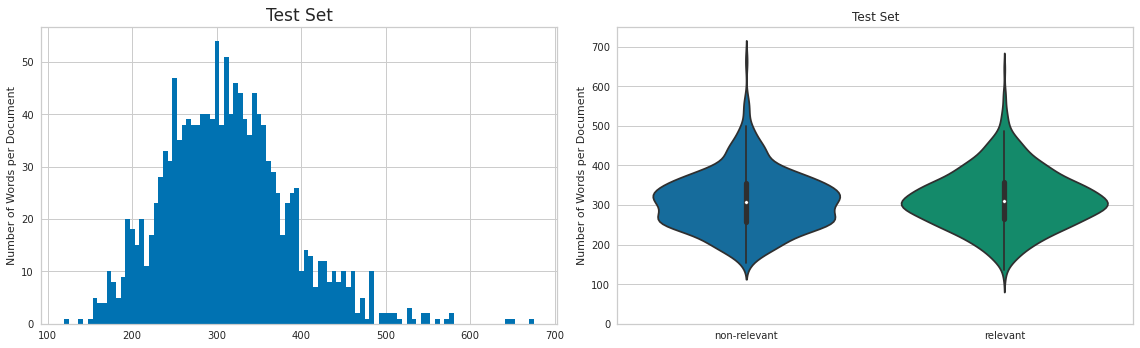

In [22]:
plot_word_count(test_dataanalysis_df, title = 'Test Set', y_lim=[0,750], filename='tewd.png', xTitle='', yTitle='Number of Words per Document')

## Number of Sentences per Document

### Train

[nltk_data] Downloading package stopwords to /home/malves/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


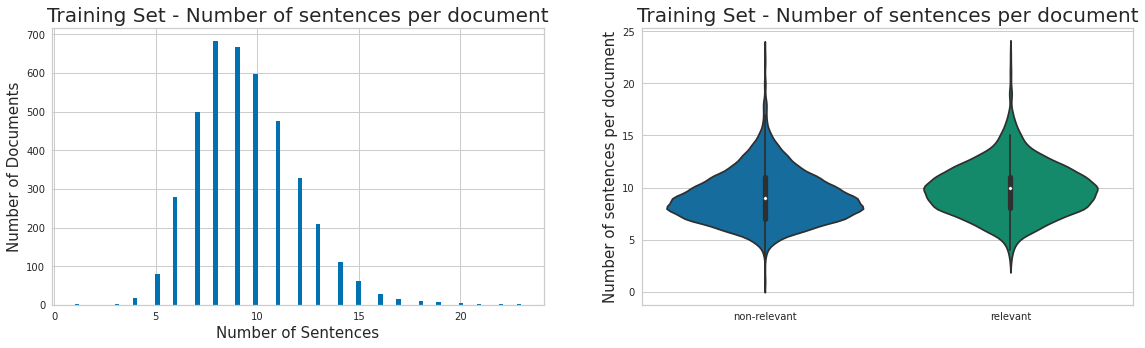

In [64]:
plot_nmr_sentences(train_dataanalysis_df,  title = 'Training Set - Number of sentences per document', filename='tsd.pdf', yTitle='Number of Documents', xTitle='Number of Sentences')

### Test

[nltk_data] Downloading package stopwords to /home/malves/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


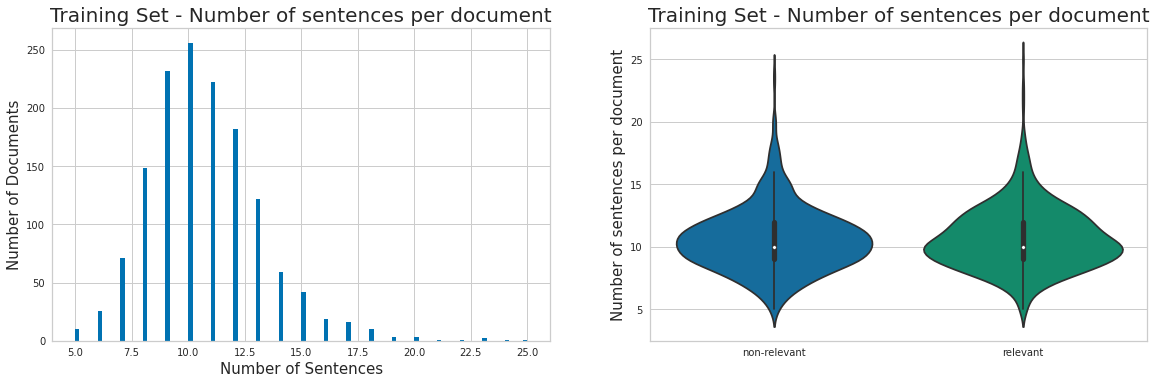

In [61]:
plot_nmr_sentences(test_dataanalysis_df,  title = 'Training Set - Number of sentences per document', filename='tsd.pdf', yTitle='Number of Documents', xTitle='Number of Sentences')

## Number of Words per Sentence

### Train

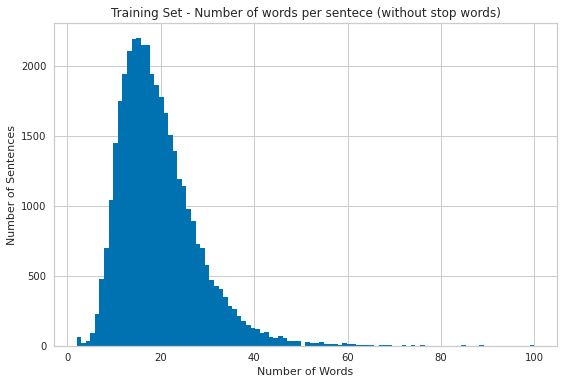

The lowest number of words in a sentence is: 2
The highest number of words in a sentece is: 100
Percentage of sentences with a number of words greater than or equal to 100: 0.02%


In [53]:
plot_words_per_sentence(train_dataanalysis_df_wsw, threshold = 100,  title = 'Training Set - Number of words per sentece (without stop words)',filename='tws.pdf', yTitle='Number of Sentences', xTitle='Number of Words')

### Test

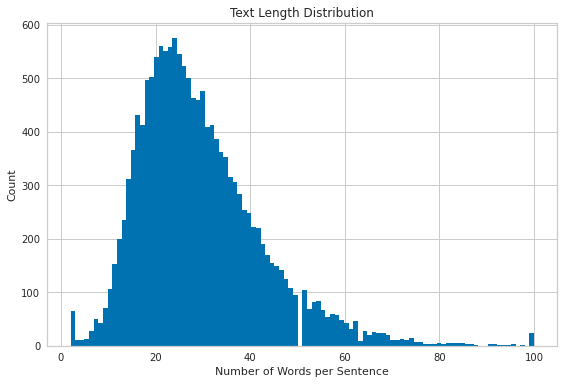

The lowest number of words in a sentence is: 2
The highest number of words in a sentece is: 100
Percentage of sentences with a number of words greater than or equal to 100: 0.16%


In [26]:
plot_words_per_sentence(test_dataanalysis_df, threshold = 100)

### Balance of Labels

### Train

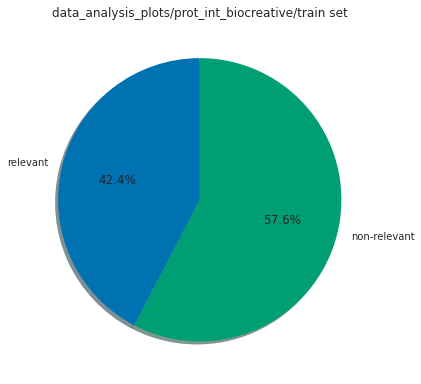

In [27]:
plot_labels_balance(train_dataanalysis_df)

### Test

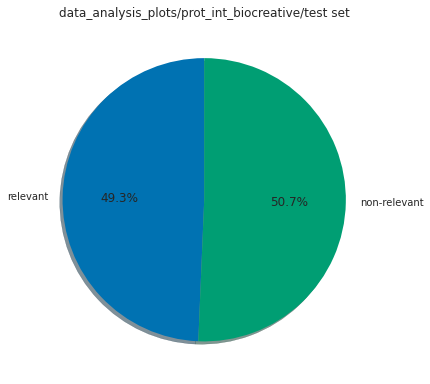

In [28]:
plot_labels_balance(test_dataanalysis_df)

## Bigrams

### Train

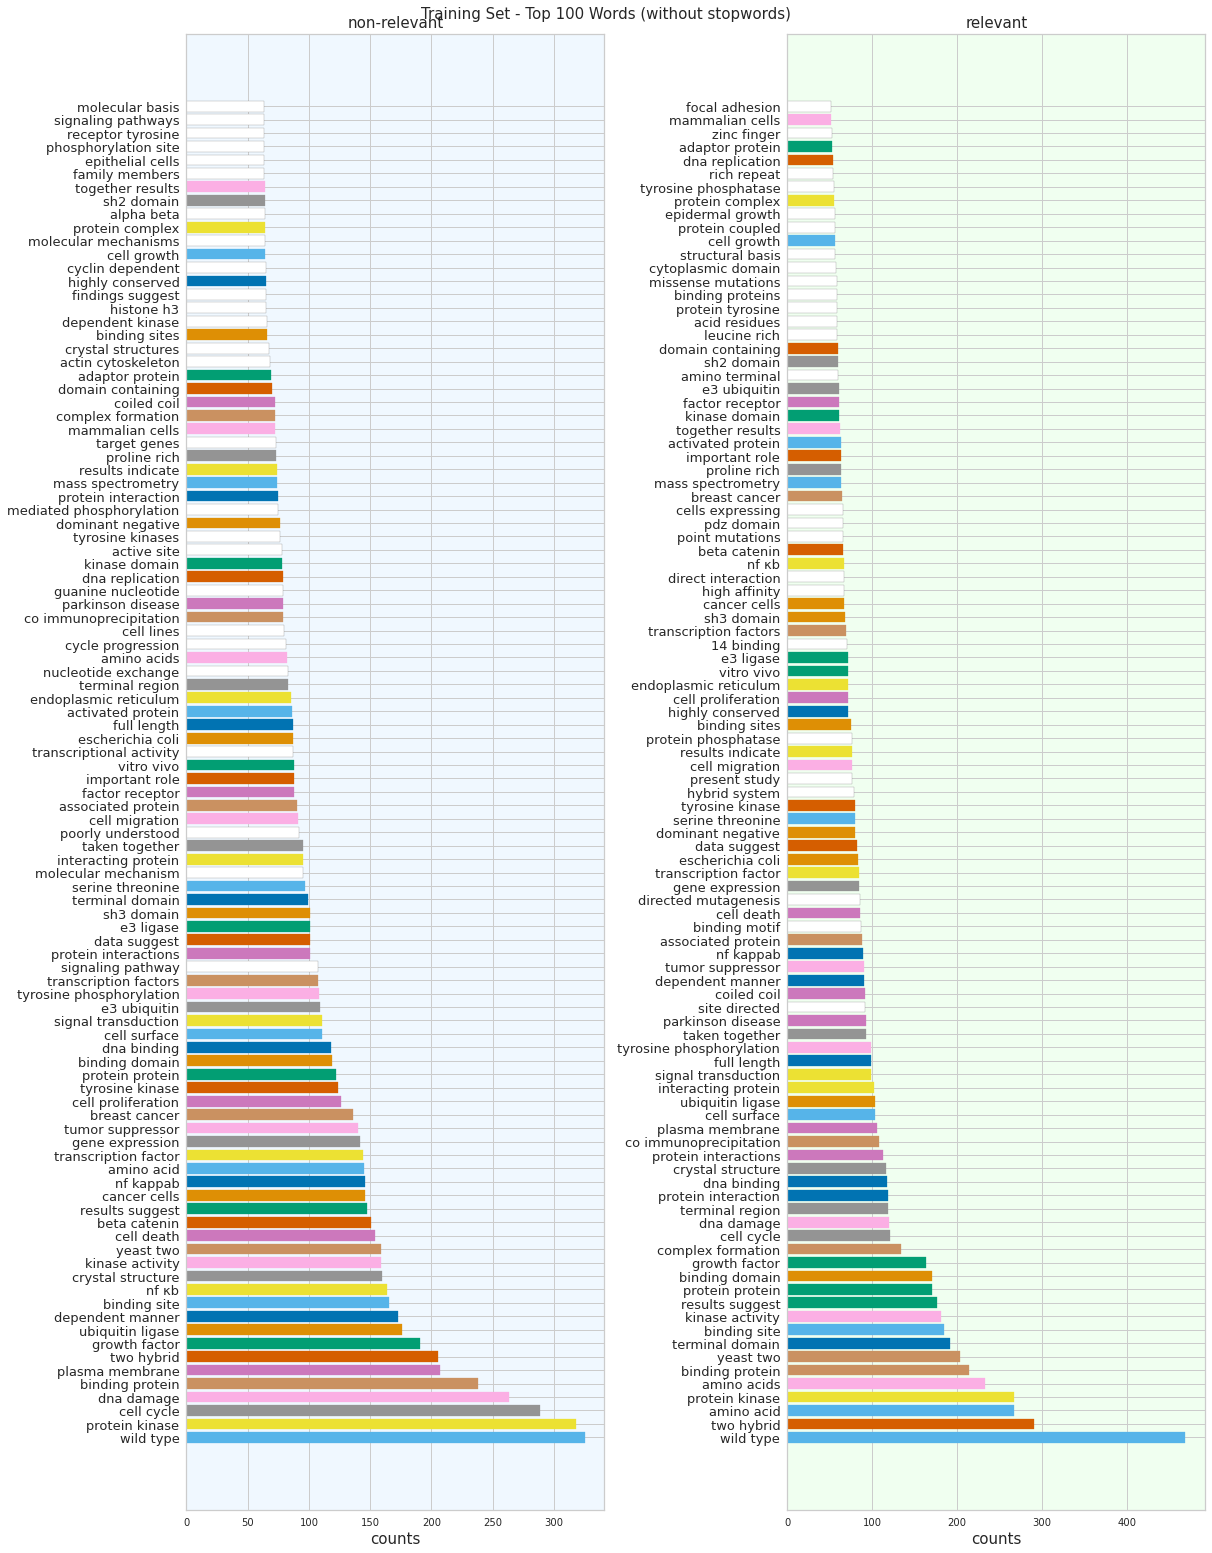

Unique words: 26 
 Non-Relevant: ['signaling pathway' 'molecular mechanism' 'poorly understood'
 'transcriptional activity' 'nucleotide exchange' 'cycle progression'
 'cell lines' 'guanine nucleotide' 'active site' 'tyrosine kinases'
 'mediated phosphorylation' 'target genes' 'actin cytoskeleton'
 'crystal structures' 'dependent kinase' 'histone h3' 'findings suggest'
 'cyclin dependent' 'molecular mechanisms' 'alpha beta' 'family members'
 'epithelial cells' 'phosphorylation site' 'receptor tyrosine'
 'signaling pathways' 'molecular basis'] 
 Relevant: ['site directed' 'binding motif' 'directed mutagenesis' 'hybrid system'
 'present study' 'protein phosphatase' '14 binding' 'high affinity'
 'direct interaction' 'point mutations' 'pdz domain' 'cells expressing'
 'amino terminal' 'leucine rich' 'acid residues' 'protein tyrosine'
 'binding proteins' 'missense mutations' 'cytoplasmic domain'
 'structural basis' 'protein coupled' 'epidermal growth'
 'tyrosine phosphatase' 'rich repeat' 'zi

In [26]:
plot_top_n_words(train_dataanalysis_df, n = 100, n_grams=2, stop_words = set(stopwords.words('english')), title='Training Set - Top 100 Words (without stopwords)', fig_dim= (17,22));

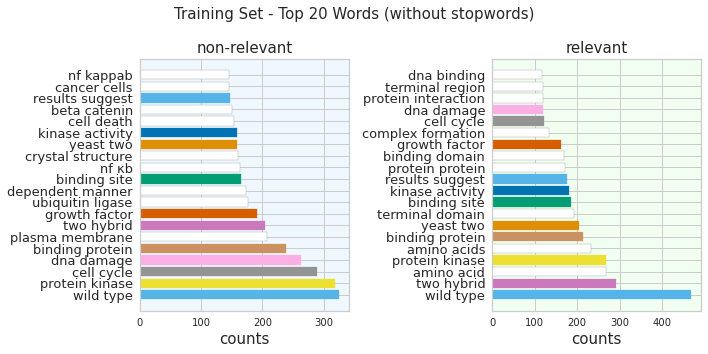

Unique words: 9 
 Non-Relevant: ['plasma membrane' 'ubiquitin ligase' 'dependent manner' 'nf κb'
 'crystal structure' 'cell death' 'beta catenin' 'cancer cells'
 'nf kappab'] 
 Relevant: ['amino acid' 'amino acids' 'terminal domain' 'protein protein'
 'binding domain' 'complex formation' 'protein interaction'
 'terminal region' 'dna binding']


In [27]:
plot_top_n_words(train_dataanalysis_df, n = 20, n_grams=2, stop_words = set(stopwords.words('english')), title='Training Set - Top 20 Words (without stopwords)', fig_dim= (10,5));

### Test

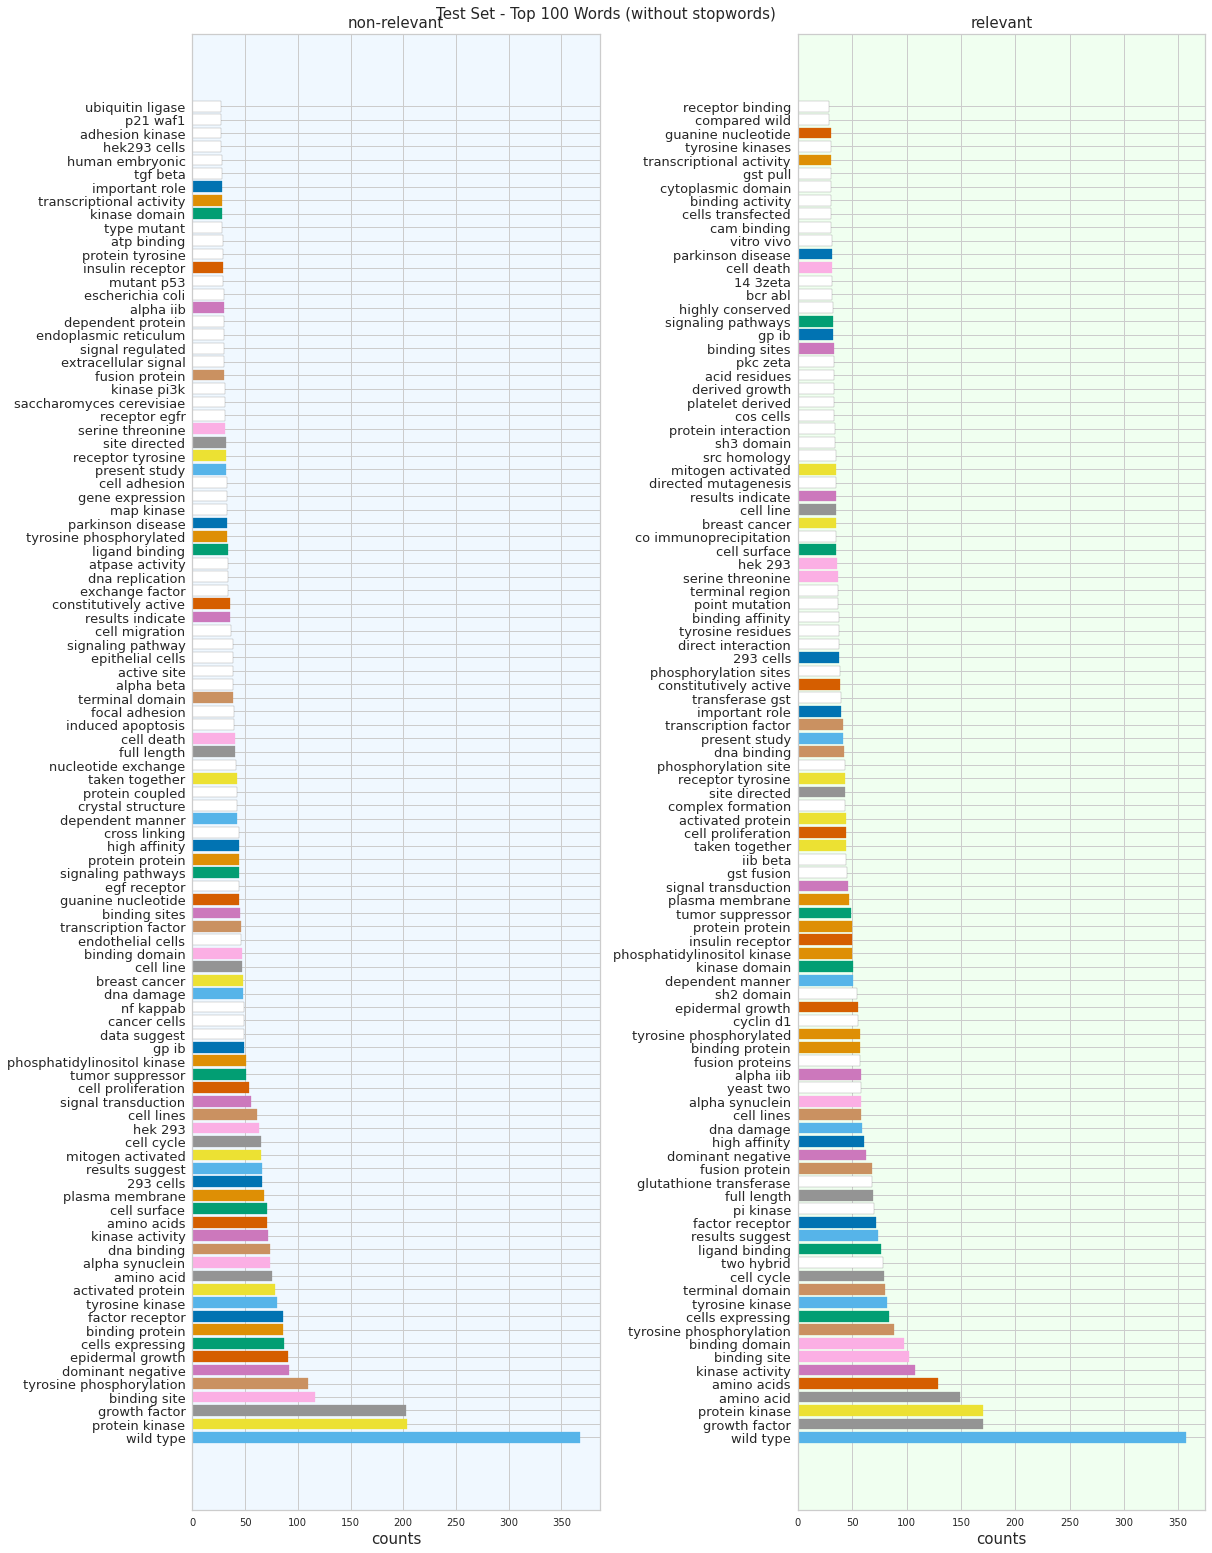

Unique words: 40 
 Non-Relevant: ['data suggest' 'cancer cells' 'nf kappab' 'endothelial cells'
 'egf receptor' 'cross linking' 'crystal structure' 'protein coupled'
 'nucleotide exchange' 'induced apoptosis' 'focal adhesion' 'alpha beta'
 'active site' 'epithelial cells' 'signaling pathway' 'cell migration'
 'exchange factor' 'dna replication' 'atpase activity' 'map kinase'
 'gene expression' 'cell adhesion' 'receptor egfr'
 'saccharomyces cerevisiae' 'kinase pi3k' 'extracellular signal'
 'signal regulated' 'endoplasmic reticulum' 'dependent protein'
 'escherichia coli' 'mutant p53' 'protein tyrosine' 'atp binding'
 'type mutant' 'tgf beta' 'human embryonic' 'hek293 cells'
 'adhesion kinase' 'p21 waf1' 'ubiquitin ligase'] 
 Relevant: ['two hybrid' 'pi kinase' 'glutathione transferase' 'yeast two'
 'fusion proteins' 'cyclin d1' 'sh2 domain' 'gst fusion' 'iib beta'
 'complex formation' 'phosphorylation site' 'transferase gst'
 'phosphorylation sites' 'direct interaction' 'tyrosine resid

In [28]:
plot_top_n_words(test_dataanalysis_df, n = 100, n_grams=2, stop_words = set(stopwords.words('english')), title='Test Set - Top 100 Words (without stopwords)', fig_dim= (17,22));

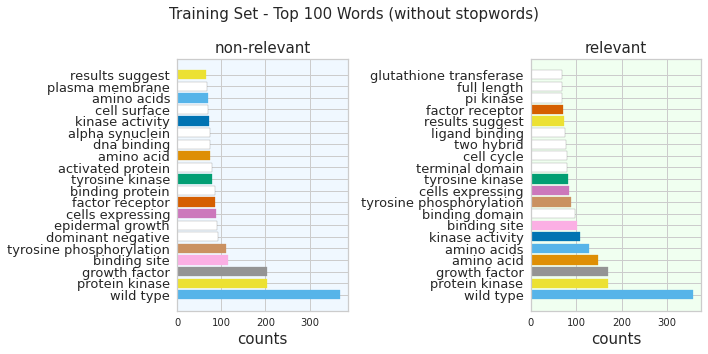

Unique words: 8 
 Non-Relevant: ['dominant negative' 'epidermal growth' 'binding protein'
 'activated protein' 'dna binding' 'alpha synuclein' 'cell surface'
 'plasma membrane'] 
 Relevant: ['binding domain' 'terminal domain' 'cell cycle' 'two hybrid'
 'ligand binding' 'pi kinase' 'full length' 'glutathione transferase']


In [29]:
plot_top_n_words(test_dataanalysis_df, n = 20, n_grams=2, stop_words = set(stopwords.words('english')), title='Training Set - Top 100 Words (without stopwords)', fig_dim= (10,5));

## Trigrams

### Train

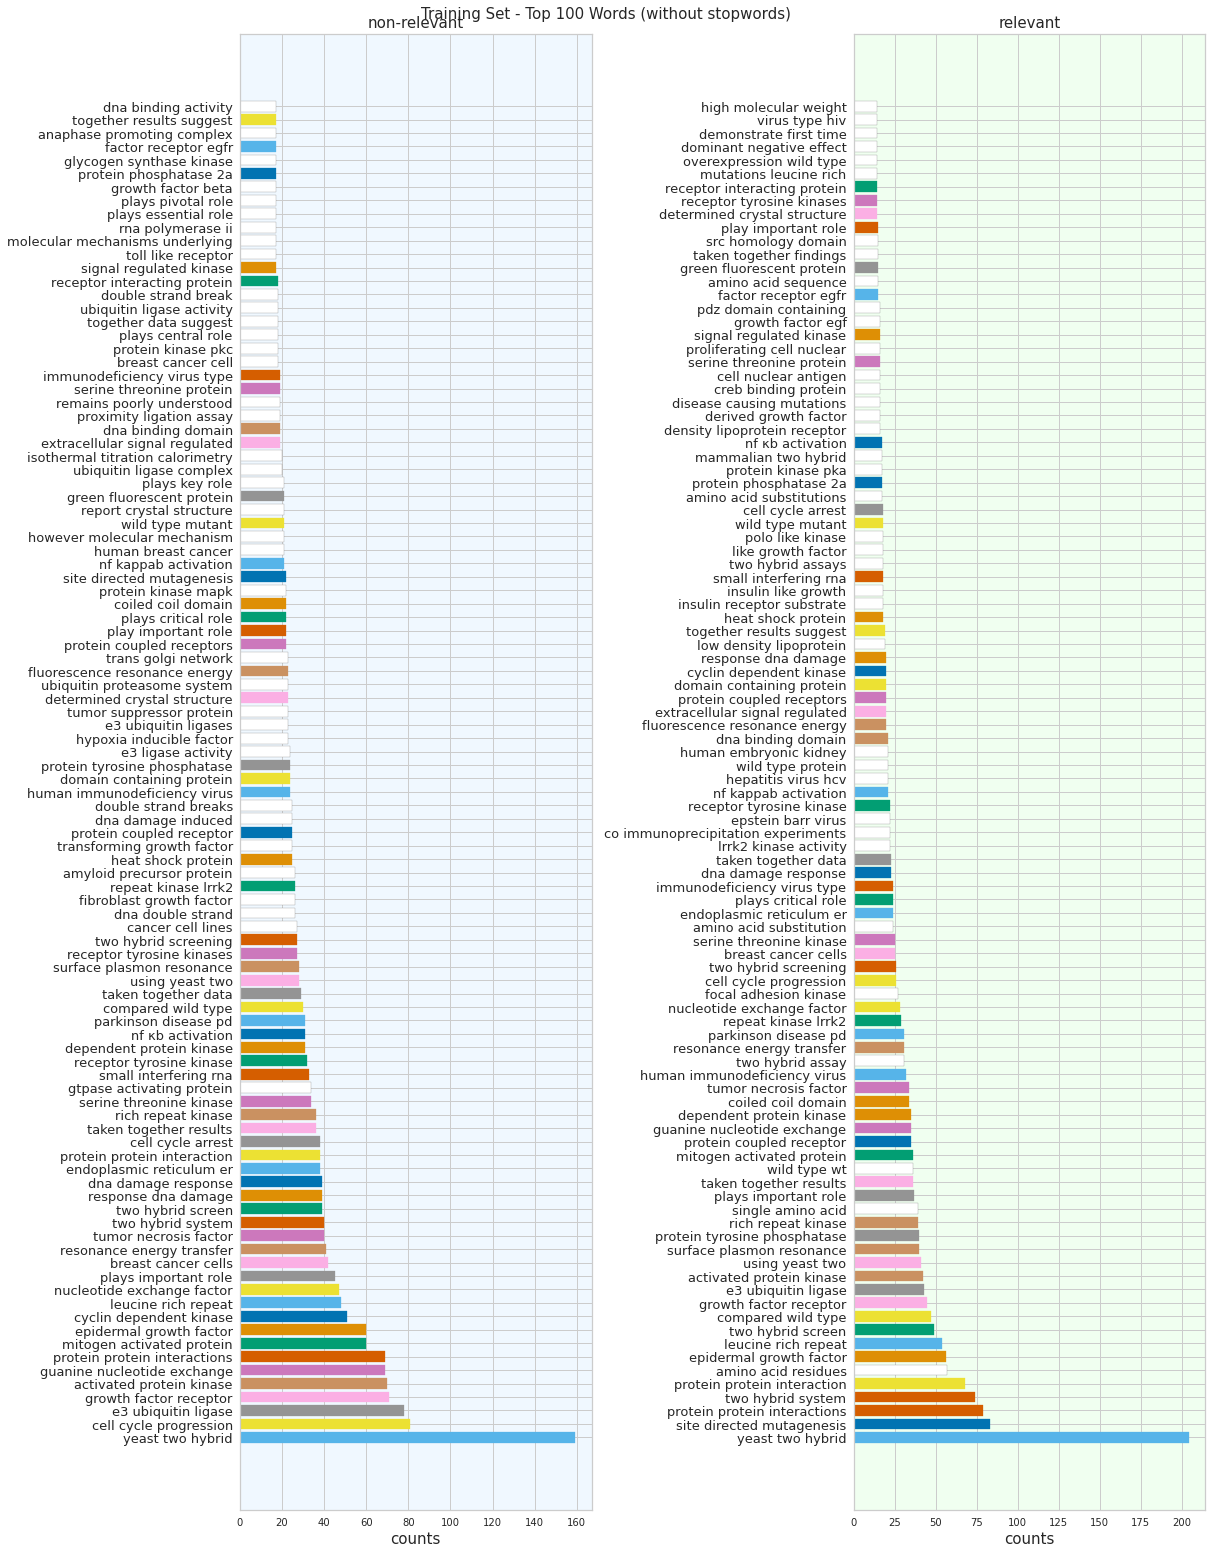

Unique words: 38 
 Non-Relevant: ['gtpase activating protein' 'cancer cell lines' 'dna double strand'
 'fibroblast growth factor' 'amyloid precursor protein'
 'transforming growth factor' 'dna damage induced' 'double strand breaks'
 'e3 ligase activity' 'hypoxia inducible factor' 'e3 ubiquitin ligases'
 'tumor suppressor protein' 'ubiquitin proteasome system'
 'trans golgi network' 'protein kinase mapk' 'human breast cancer'
 'however molecular mechanism' 'report crystal structure' 'plays key role'
 'ubiquitin ligase complex' 'isothermal titration calorimetry'
 'proximity ligation assay' 'remains poorly understood'
 'breast cancer cell' 'protein kinase pkc' 'plays central role'
 'together data suggest' 'ubiquitin ligase activity' 'double strand break'
 'toll like receptor' 'molecular mechanisms underlying'
 'rna polymerase ii' 'plays essential role' 'plays pivotal role'
 'growth factor beta' 'glycogen synthase kinase'
 'anaphase promoting complex' 'dna binding activity'] 
 Relevant: ['

In [30]:
plot_top_n_words(train_dataanalysis_df, n = 100, n_grams=3, stop_words = set(stopwords.words('english')), title='Training Set - Top 100 Words (without stopwords)', fig_dim= (17,22));

### Test

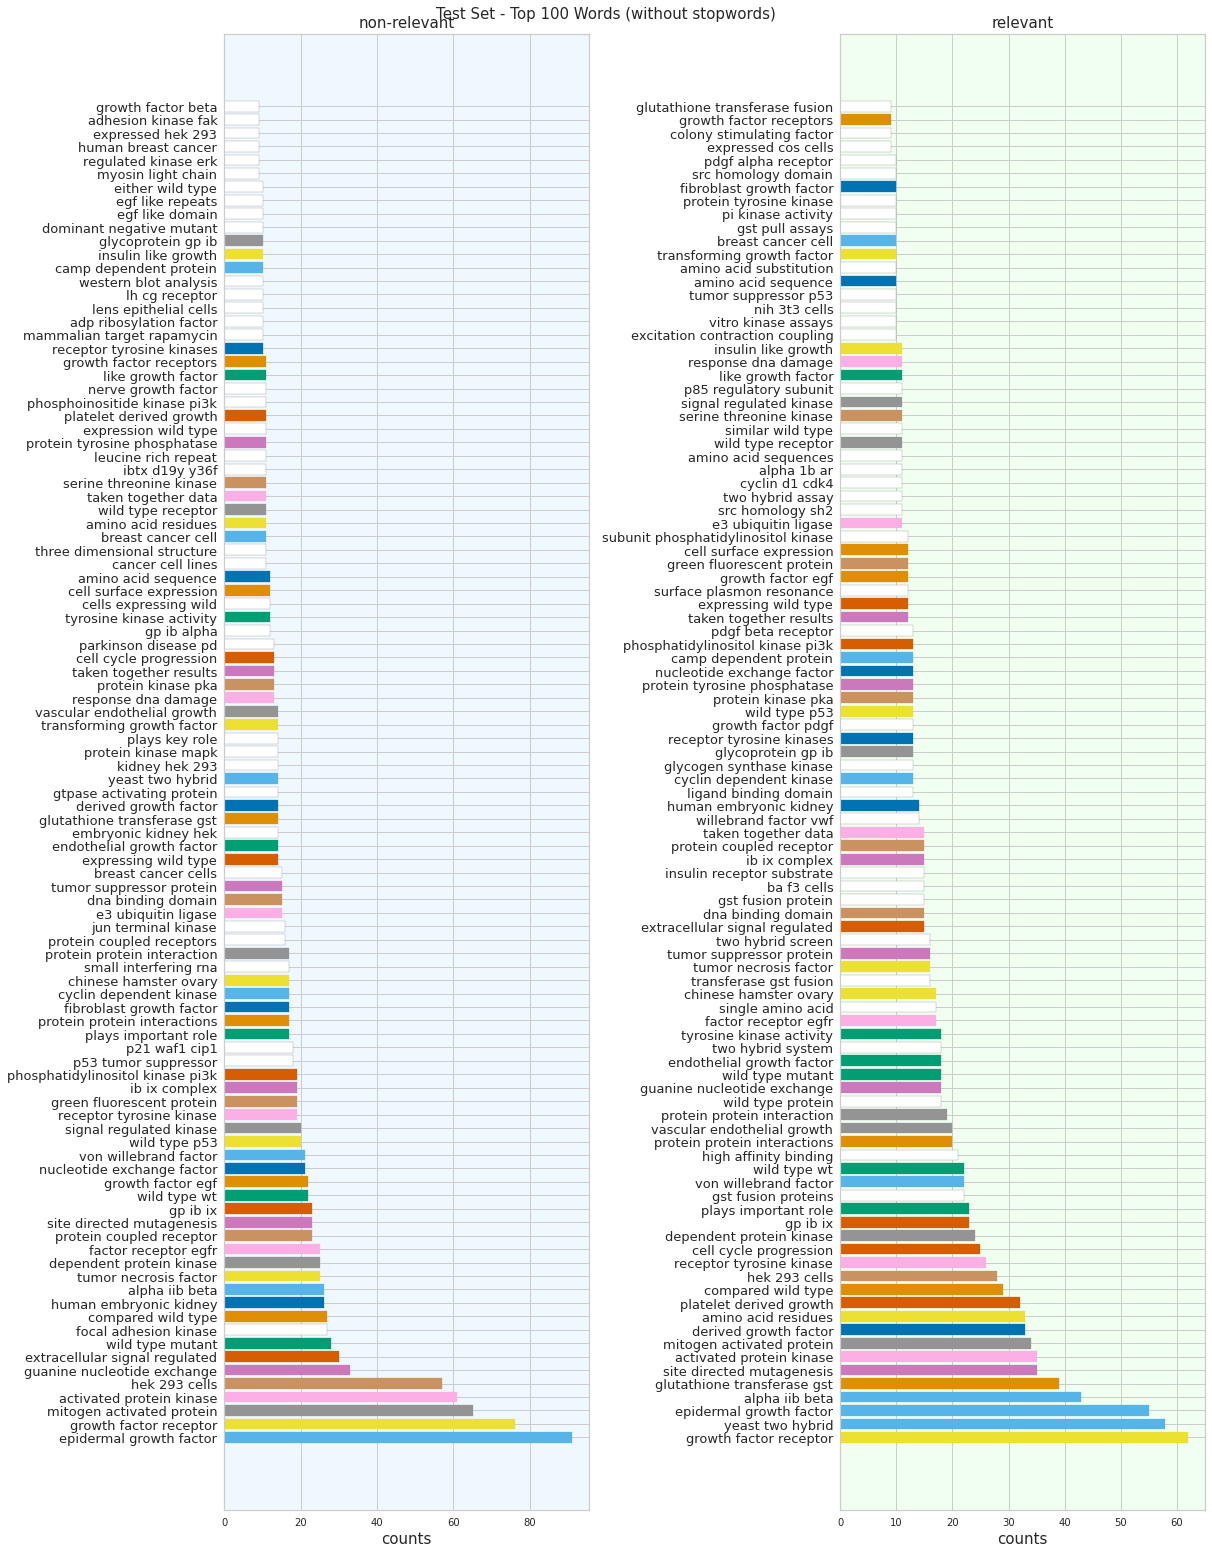

Unique words: 37 
 Non-Relevant: ['focal adhesion kinase' 'p53 tumor suppressor' 'p21 waf1 cip1'
 'small interfering rna' 'protein coupled receptors' 'jun terminal kinase'
 'breast cancer cells' 'embryonic kidney hek' 'gtpase activating protein'
 'kidney hek 293' 'protein kinase mapk' 'plays key role'
 'parkinson disease pd' 'gp ib alpha' 'cells expressing wild'
 'cancer cell lines' 'three dimensional structure' 'ibtx d19y y36f'
 'leucine rich repeat' 'expression wild type'
 'phosphoinositide kinase pi3k' 'nerve growth factor'
 'mammalian target rapamycin' 'adp ribosylation factor'
 'lens epithelial cells' 'lh cg receptor' 'western blot analysis'
 'dominant negative mutant' 'egf like domain' 'egf like repeats'
 'either wild type' 'myosin light chain' 'regulated kinase erk'
 'human breast cancer' 'expressed hek 293' 'adhesion kinase fak'
 'growth factor beta'] 
 Relevant: ['gst fusion proteins' 'high affinity binding' 'wild type protein'
 'two hybrid system' 'single amino acid' 'transfe

In [31]:
plot_top_n_words(test_dataanalysis_df, n = 100, n_grams=3, stop_words = set(stopwords.words('english')), title='Test Set - Top 100 Words (without stopwords)', fig_dim= (17,22));

## Corpus Visualization (t-SNE and UMAP)

In [29]:
stop_words = set(stopwords.words('english'))            #####
lower = True                #####
remove_punctuation = False
split_by_hyphen = True
lemmatization = False           #####
stems = False                       #####

## Relevant Documents vs Nonrelevant Documents

In [30]:
docs_train_wsw = bioc_to_docs(train_dataset_path, stop_words=stop_words, lower=lower, remove_punctuation=remove_punctuation,
                            split_by_hyphen=split_by_hyphen, lemmatization=lemmatization, stems=stems)

relevances_train_wsw = bioc_to_relevances(train_dataset_path, 'protein-protein')


x_train_df_wsw = docs_to_pandasdocs(docs_train_wsw)
y_train_df_wsw = relevances_to_pandas(x_train_df_wsw, relevances_train)

In [31]:
train_dataanalysis_df_wsw = analysis_dataframe(x_train_df_wsw, y_train_df_wsw, dataset_name='prot_int_biocreative', set='train')

In [32]:
docs_test_wsw = bioc_to_docs(test_dataset_path, stop_words=stop_words, lower=lower, remove_punctuation=remove_punctuation,
                            split_by_hyphen=split_by_hyphen, lemmatization=lemmatization, stems=stems)

relevances_test_wsw = bioc_to_relevances(test_dataset_path, 'protein-protein')


x_test_df_wsw = docs_to_pandasdocs(docs_test_wsw)
y_test_df_wsw = relevances_to_pandas(x_test_df_wsw, relevances_test)

In [33]:
test_dataanalysis_df_wsw = analysis_dataframe(x_test_df_wsw, y_test_df_wsw, dataset_name='prot_int_biocreative', set='test')

[nltk_data] Downloading package stopwords to /home/malves/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


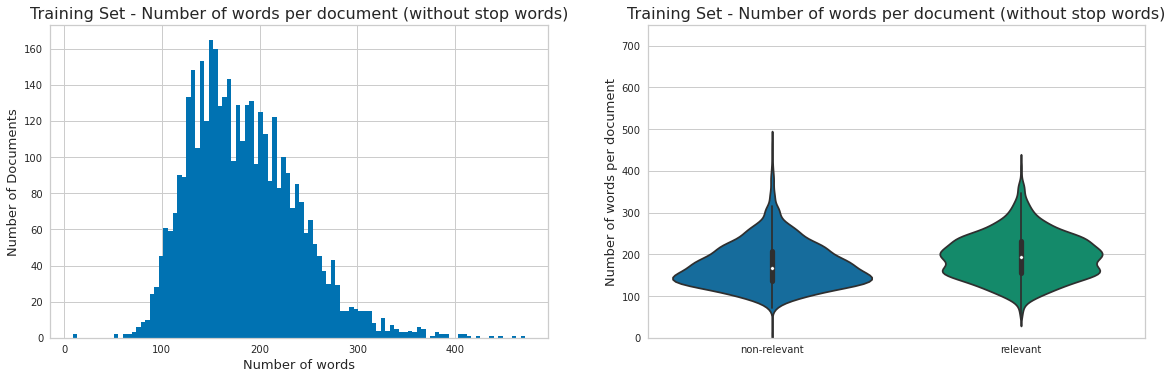

In [42]:
plot_word_count(train_dataanalysis_df_wsw, title = 'Training Set - Number of words per document (without stop words)', y_lim=[0,750], filename='twd.pdf', xTitle='', yTitle='Number of Words per Document')

### Train

### t-SNE with TF-IDF

In [37]:
import seaborn as sns
p = sns.color_palette('colorblind')

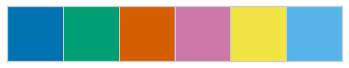

In [38]:
from yellowbrick.style.palettes import PALETTES, SEQUENCES, color_palette
color_palette('sns_colorblind').plot()

In [39]:
x = color_palette('sns_colorblind')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


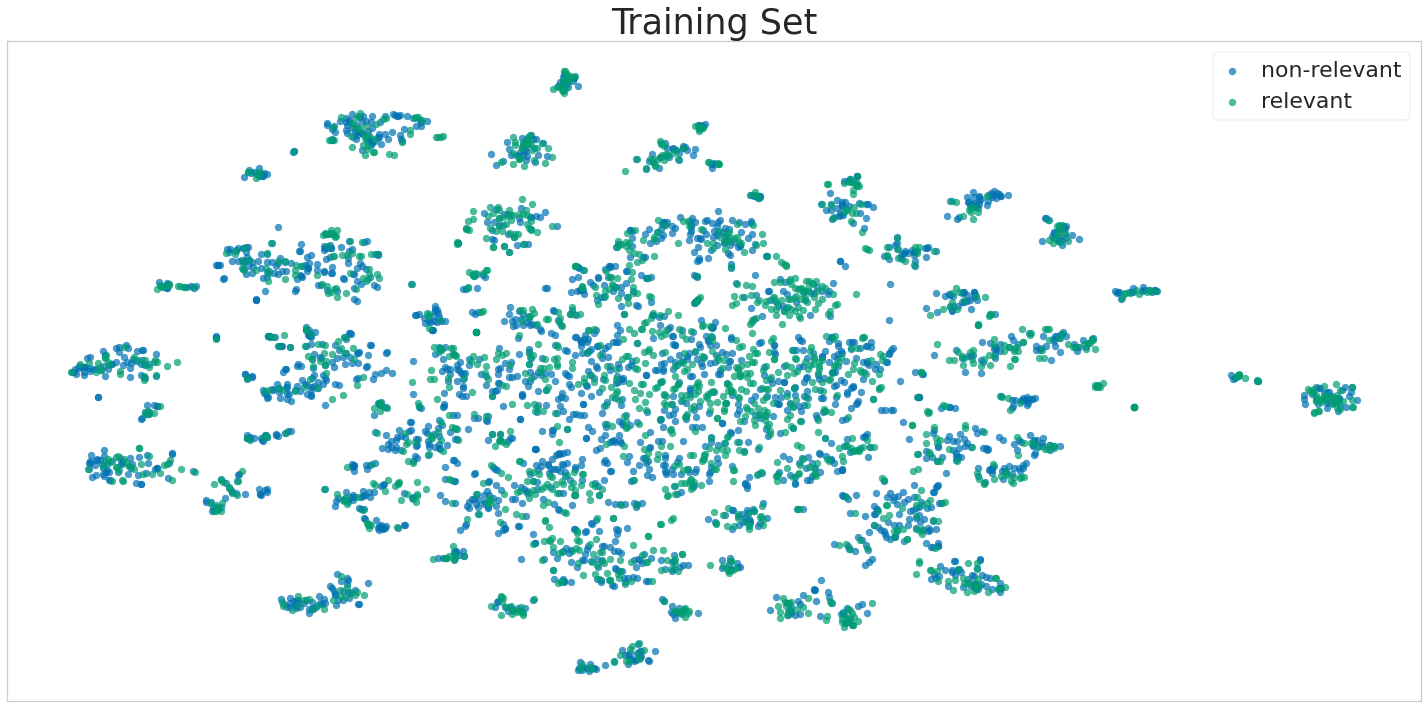

In [40]:
plt.rcParams['figure.figsize'] = [20,10]
corpus_visualization(train_dataanalysis_df_wsw, dim_red='tsne', feature_ext='tfidf', random_state=123123, decompose_byint=50, file_name='train_tsne.pdf')
                

### t-SNE with Bag-Of-Words

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


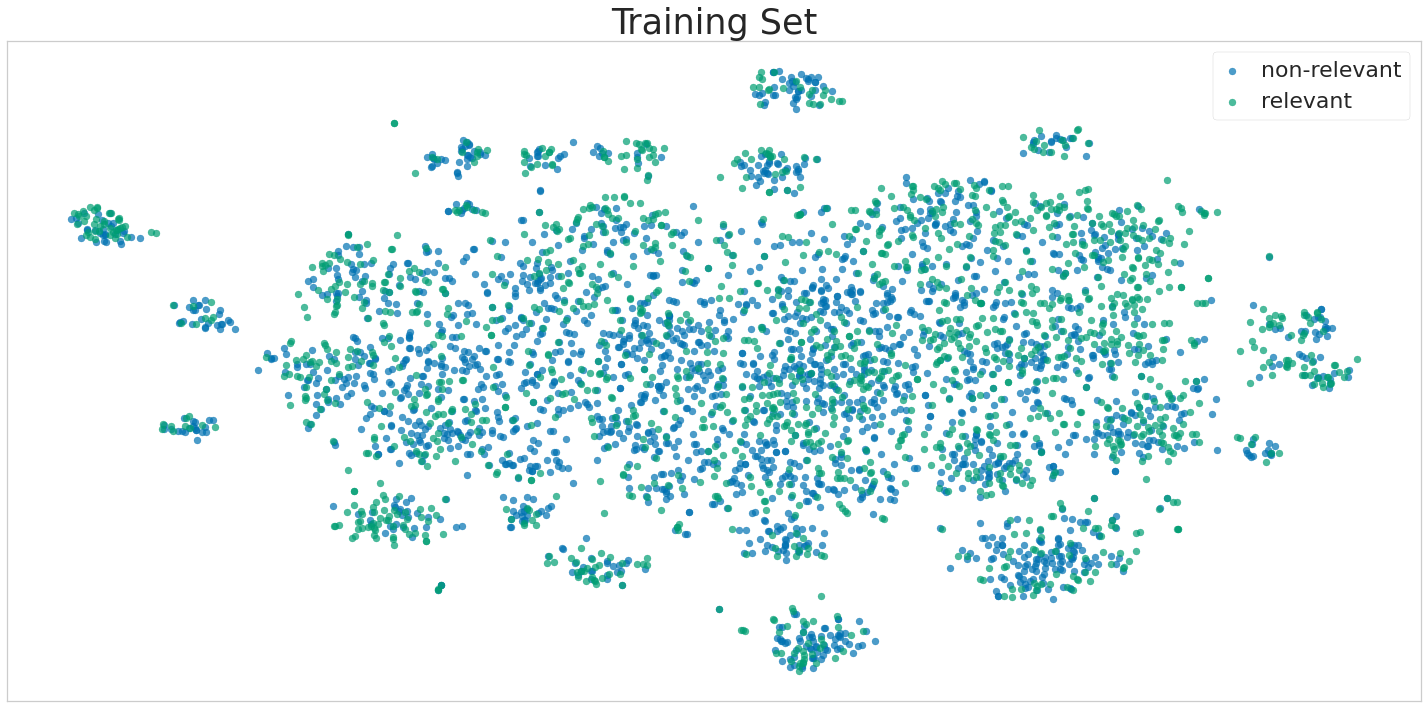

In [41]:
corpus_visualization(train_dataanalysis_df_wsw, dim_red='tsne', feature_ext='bow', random_state=123123)

### UMAP with TF-IDF

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


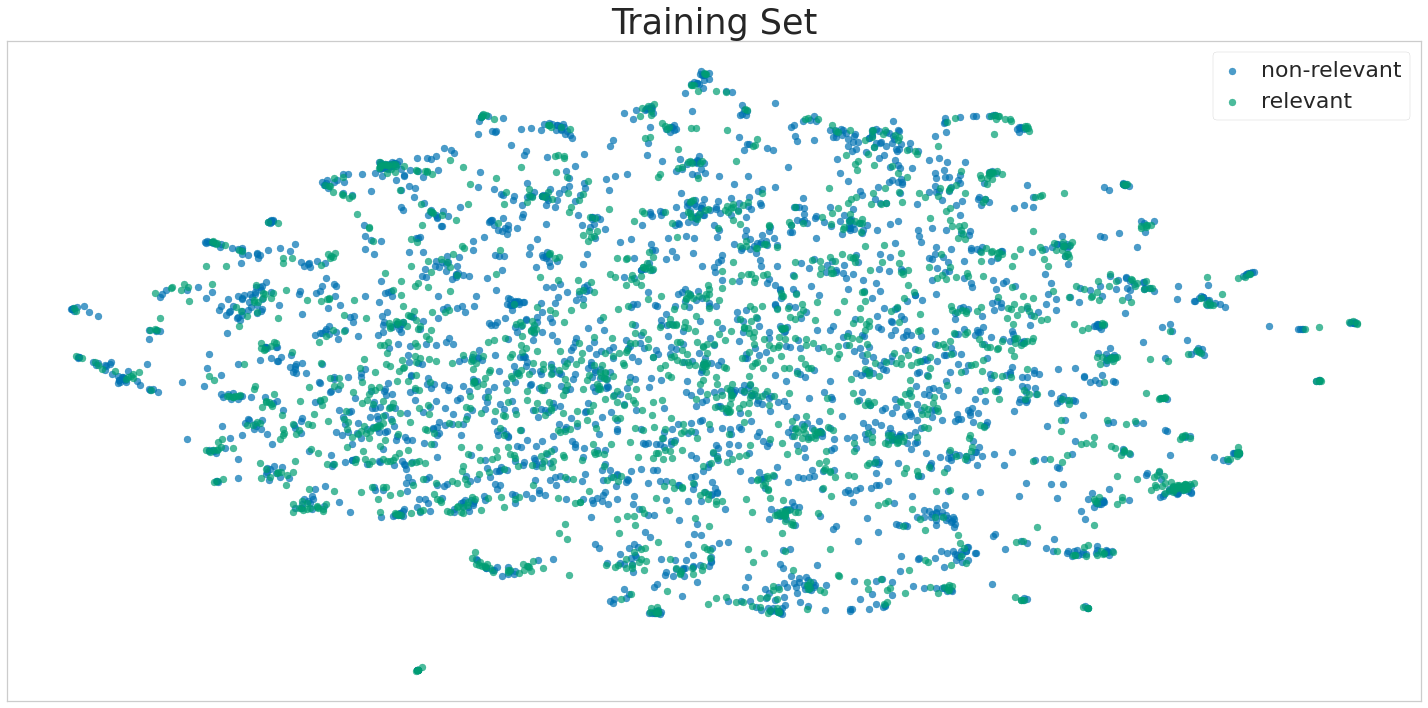

In [42]:
corpus_visualization(train_dataanalysis_df_wsw, dim_red='UMAP', feature_ext='tfidf', random_state=123123)

### UMAP with Bag-Of-Words

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


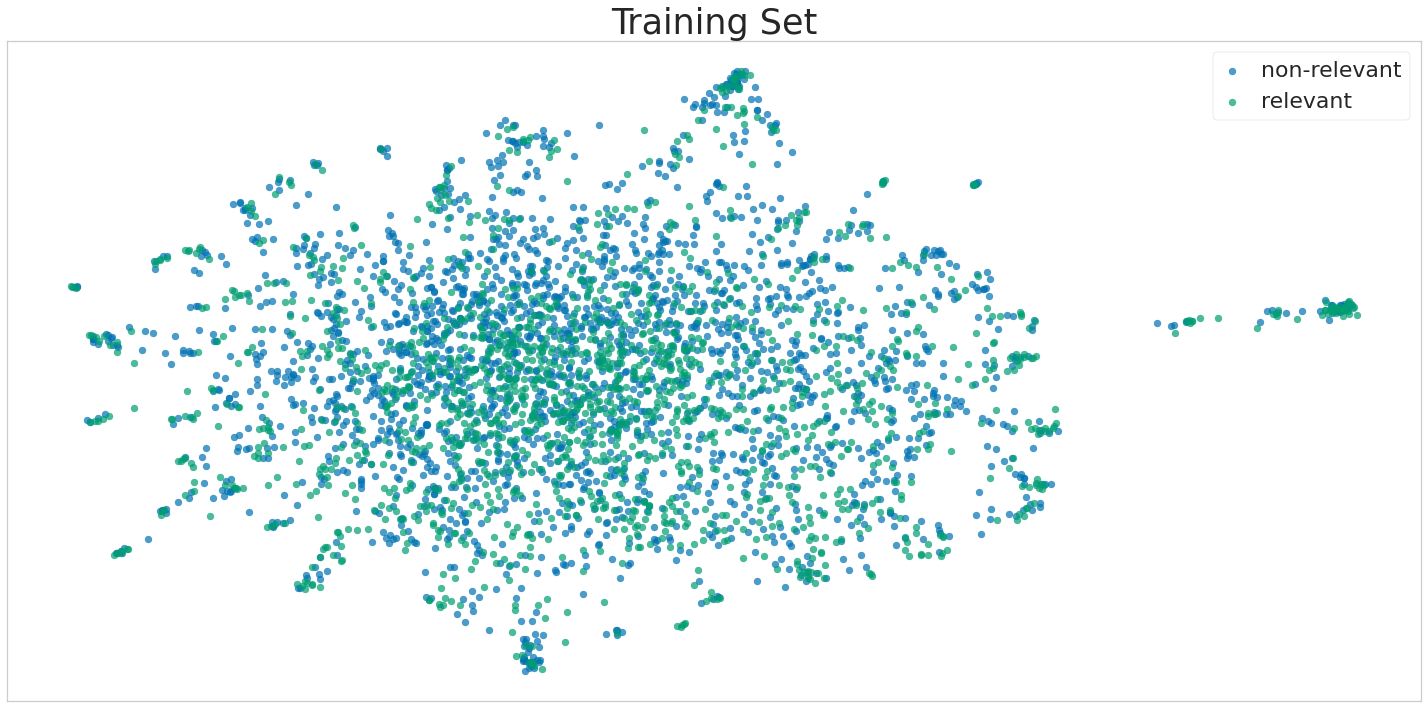

In [43]:
corpus_visualization(train_dataanalysis_df_wsw, dim_red='UMAP', feature_ext='bow', random_state=123123)

### Test

### t-SNE with TF-IDF

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


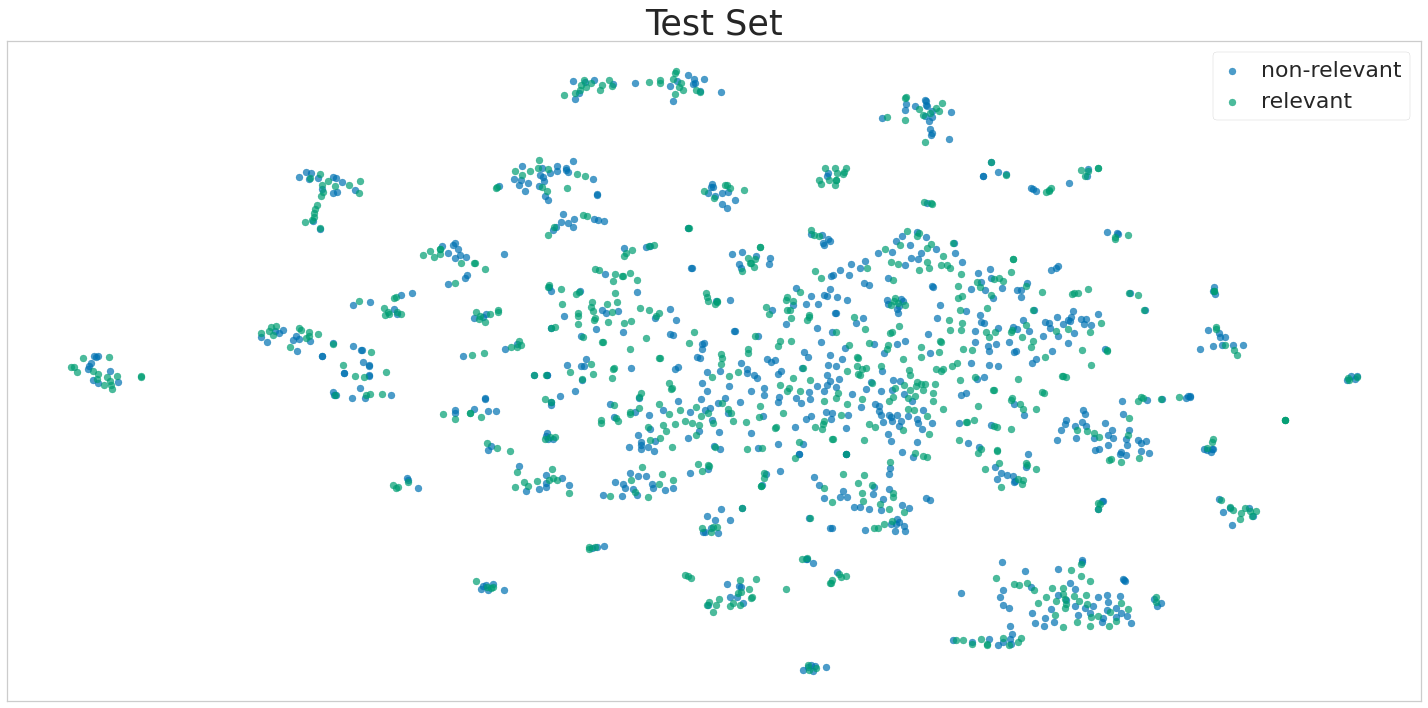

In [44]:
corpus_visualization(test_dataanalysis_df_wsw, dim_red='tsne', feature_ext='tfidf', random_state=123123, decompose_byint=50, file_name='test_tsne.pdf')

### t-SNE with Bag-Of-Words

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


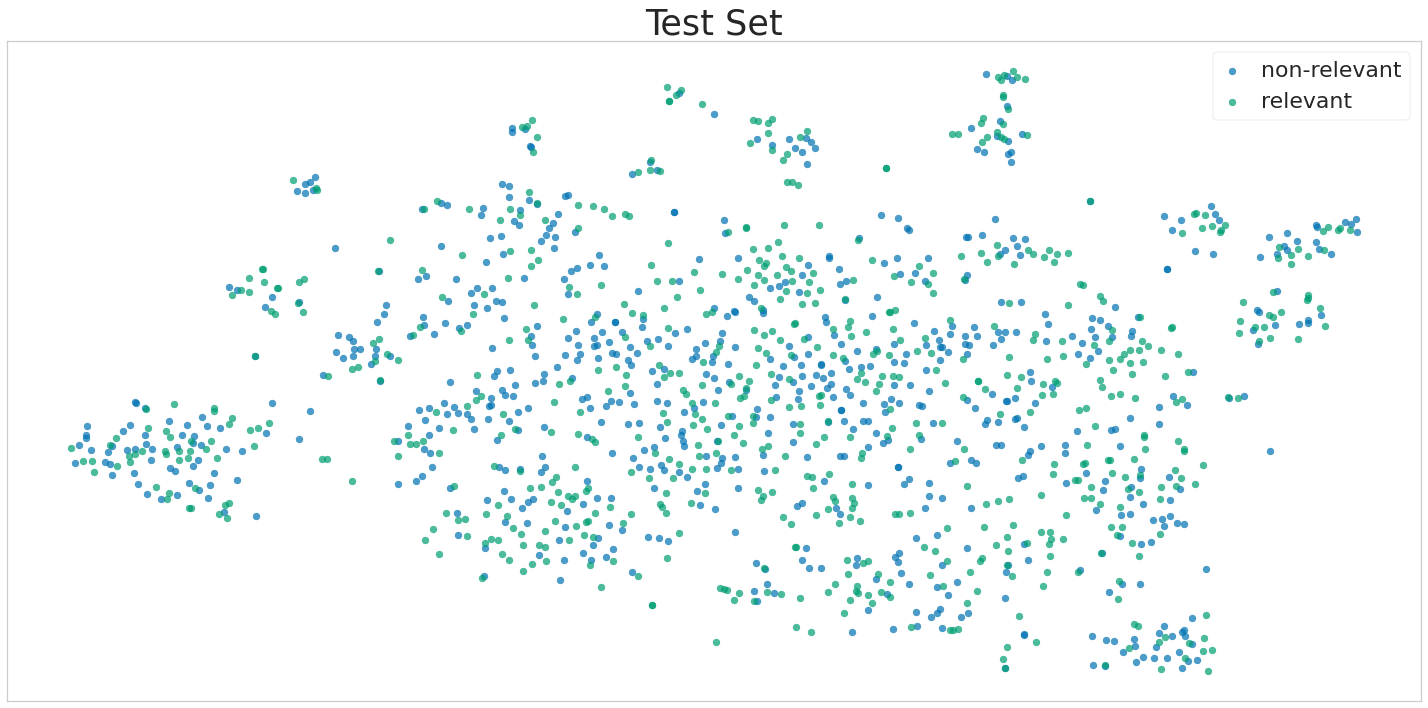

In [45]:
corpus_visualization(test_dataanalysis_df_wsw, dim_red='tsne', feature_ext='bow', random_state=123123)

### UMAP with TF-IDF

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


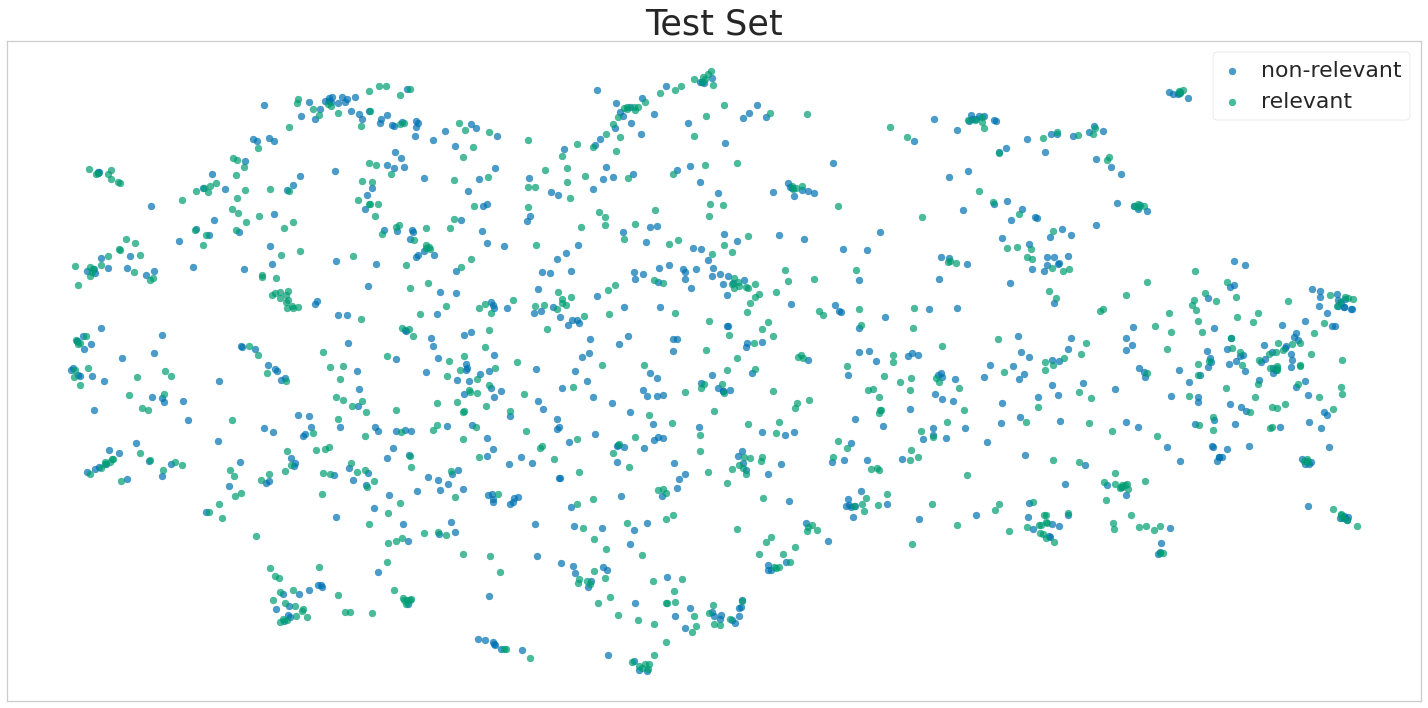

In [46]:
corpus_visualization(test_dataanalysis_df_wsw, dim_red='UMAP', feature_ext='tfidf', random_state=123123)

### UMAP with Bag-Of-Words

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


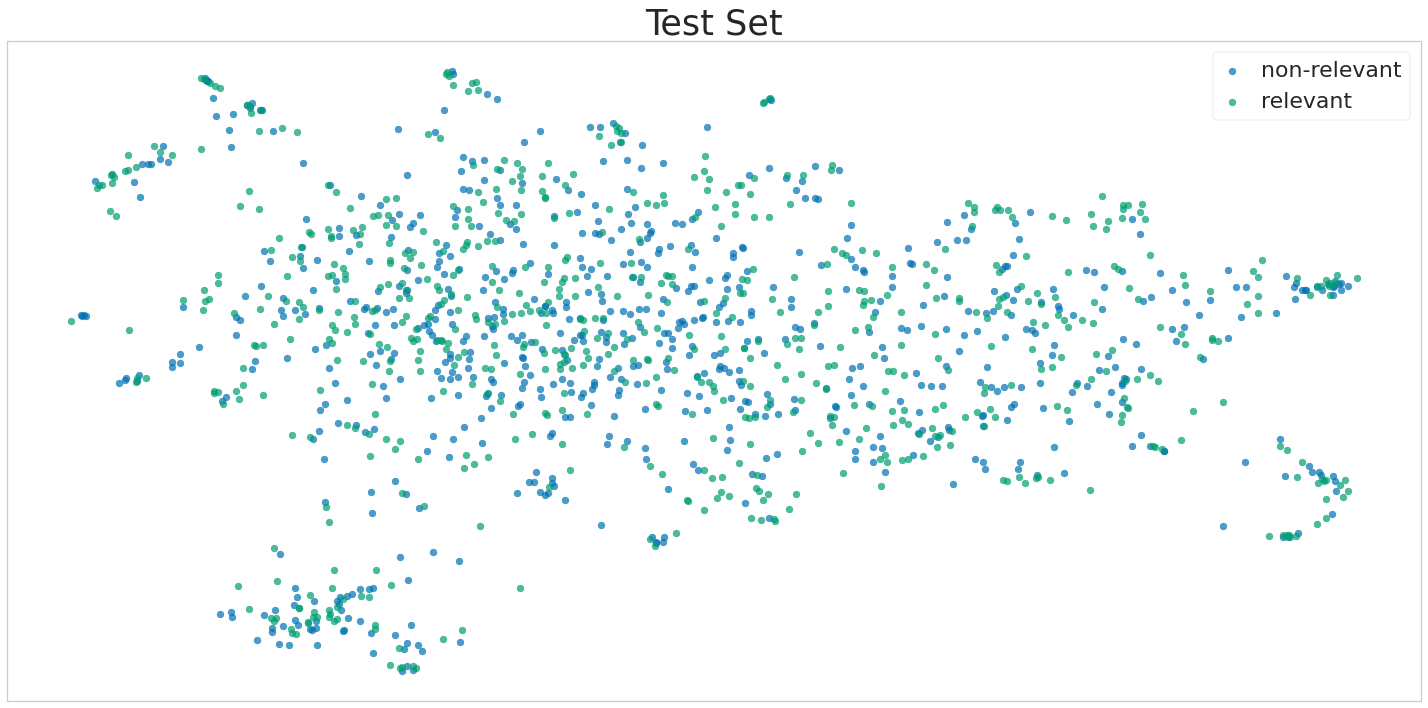

In [47]:
corpus_visualization(test_dataanalysis_df_wsw, dim_red='UMAP', feature_ext='bow', random_state=123123)

## LSA topic modelling

### Train

Loading BokehJS ...

Topic 1:  protein binding domain
Topic 2:  lrrk2 pd parkinson
Topic 3:  p53 mdm2 mdmx
Topic 4:  tyrosine src phosphorylation
Topic 5:  dna damage dna damage
Topic 6:  catenin nf beta catenin


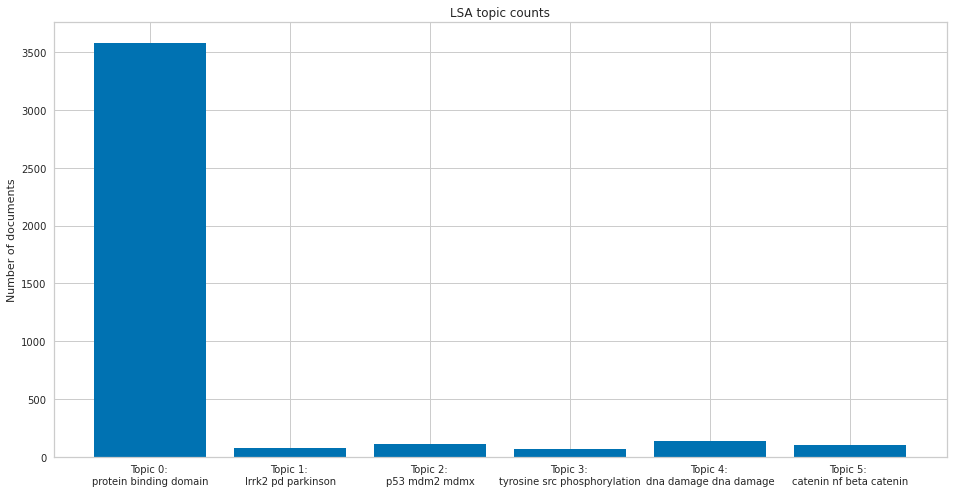

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 4082 samples in 0.003s...
[t-SNE] Computed neighbors for 4082 samples in 0.402s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4082
[t-SNE] Computed conditional probabilities for sample 2000 / 4082
[t-SNE] Computed conditional probabilities for sample 3000 / 4082
[t-SNE] Computed conditional probabilities for sample 4000 / 4082
[t-SNE] Computed conditional probabilities for sample 4082 / 4082
[t-SNE] Mean sigma: 0.017659
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.913246
[t-SNE] KL divergence after 2000 iterations: 1.283033


In [48]:
from bokeh.io import output_notebook
output_notebook()
LSA_topic_modelling(train_dataanalysis_df, n_topics = 6)

### Test

Loading BokehJS ...

Topic 1:  protein binding receptor
Topic 2:  p53 mdm2 dna
Topic 3:  egfr egf activation
Topic 4:  raf ras kinase
Topic 5:  alpha synuclein alpha synuclein
Topic 6:  egfr egf vwf


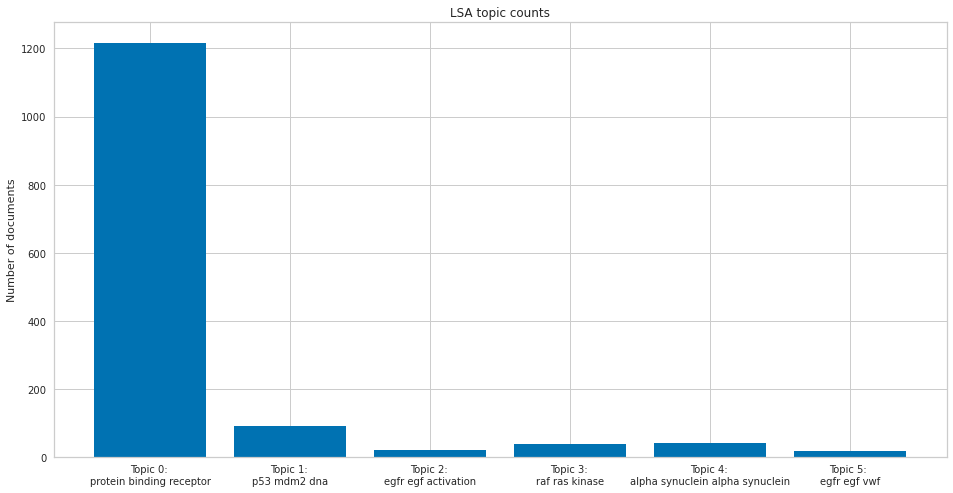

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1427 samples in 0.002s...
[t-SNE] Computed neighbors for 1427 samples in 0.109s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1427
[t-SNE] Computed conditional probabilities for sample 1427 / 1427
[t-SNE] Mean sigma: 0.032686
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.615356
[t-SNE] KL divergence after 2000 iterations: 0.794090


In [49]:
from bokeh.io import output_notebook
output_notebook()


LSA_topic_modelling(test_dataanalysis_df, n_topics = 6)

## Embeddings

In [50]:
def get_word_from_id(id):
    return list(d.keys())[list(d.values()).index(id)]

In [51]:
from sklearn.metrics.pairwise import cosine_similarity
def get_cosine_similarity(feature_vec_1, feature_vec_2):    
    return cosine_similarity(feature_vec_1.reshape(1, -1), feature_vec_2.reshape(1, -1))[0][0]

In [52]:
def word_similarity(word_id):
    similarities = {}
    for word_id2 in range(len(embedding_matrix)):
        sim = get_cosine_similarity(embedding_matrix[word_id], embedding_matrix[word_id2])
        similarities[word_id2] = sim
    return similarities

### Biowordvec

In [54]:
from tensorflow.keras.preprocessing import text
from preprocessing.config import DLConfig
from preprocessing.dl import DL_preprocessing
from preprocessing.embeddings import compute_embedding_matrix

config = DLConfig()
config.seed_value = 123123
config.padding = 'post'          
config.truncating = 'post'      
config.oov_token = 'OOV'

config.max_sent_len = 50  
config.max_nb_words = 100_000      

config.tokenizer = text.Tokenizer(num_words=config.max_nb_words, oov_token=config.oov_token)

config.embeddings == 'biowordvec'
config.embedding_path = './embeddings/biowordvec'
config.embedding_dim = 200
embedding_format = 'word2vec'


    
x_train, y_train = DL_preprocessing(x_train_df, y_train_df, config, dataset='train',
                                    seed_value=config.seed_value)

embedding_matrix = compute_embedding_matrix(config, embeddings_format = embedding_format)

Found 30085 unique tokens.
Creating Embedding Matrix...
Embedding Matrix Created 
------------------------
number of null word embeddings: 3025 in a total of 30085 words (10.05%)
words not found: 3024
e.g. 10 words not found in the index :  ['°c' 'd942fsxc71' 'p163l' 'iα' 'hoil' 'k494r' 'y1056a' 'leu2013ala'
 'grk6c' 'r826a' 'rpgt908t' 'arg41ala' 'd672n' 'v660e' 'lptbcdf']


In [55]:
protein_index = config.tokenizer.word_index['protein']
print("Dimension of the word embedding for the word 'protein': ", len(config.embedding_matrix[protein_index]))
print("Index for the word 'protein': ", protein_index)

Dimension of the word embedding for the word 'protein':  200
Index for the word 'protein':  12


In [56]:
d = config.tokenizer.word_index
print(get_word_from_id(protein_index))

protein


In [57]:
get_cosine_similarity(embedding_matrix[2], embedding_matrix[10])

0.6782618899904483

In [58]:
protein_sim = word_similarity(protein_index)

In [59]:
sorted_protein_sim = dict(sorted(protein_sim.items(), key = lambda kv:kv[1], reverse = True))
sorted_protein_sim

{12: 1.0000000000000002,
 25: 0.8492163883404373,
 16911: 0.8317234267516331,
 27267: 0.8081847981702888,
 21932: 0.7615577223114336,
 20263: 0.7605440050275153,
 1955: 0.7180632079763221,
 529: 0.6946592658834106,
 6879: 0.6810725199347456,
 57: 0.674041723174384,
 88: 0.6729690866847604,
 146: 0.6679661831180896,
 21250: 0.663000653553067,
 1852: 0.6594482185483297,
 2334: 0.656055725130947,
 16486: 0.6490950284667727,
 994: 0.6475068818696137,
 250: 0.6466476148786984,
 12686: 0.6446889459695015,
 27: 0.641087908494542,
 9318: 0.6374115074943009,
 1825: 0.6365191539305388,
 200: 0.6359443827812851,
 15055: 0.6327049712158157,
 656: 0.6326868191310543,
 117: 0.6324075024142652,
 201: 0.6319519755611006,
 2950: 0.6314604922231619,
 24: 0.6313244722496845,
 388: 0.6276565666447829,
 3825: 0.627420236213912,
 13515: 0.6273094845135649,
 17118: 0.6271374915951002,
 26016: 0.6255383115281972,
 719: 0.6244765879139479,
 24547: 0.6239770860484297,
 16676: 0.6238621477769084,
 3907: 0.623443

In [60]:
top_similar_ids = list(sorted_protein_sim.keys())[0:10]
top_similar_vectors = []
for id in top_similar_ids:
    top_similar_vectors.append(embedding_matrix[id])
top_similar_vectors = np.array(top_similar_vectors)
top_similar_vectors

array([[-0.07245355,  0.07182787, -0.17060111, ..., -0.4938539 ,
         0.16873896,  0.17331192],
       [-0.17053185,  0.01896861, -0.13493659, ..., -0.490998  ,
         0.15951855, -0.06146329],
       [-0.02653702,  0.1557602 ,  0.0821391 , ..., -0.4174194 ,
         0.02749863,  0.16496836],
       ...,
       [ 0.21255092, -0.16039114, -0.01661903, ..., -0.26566628,
        -0.02902287,  0.30640516],
       [-0.09194656, -0.05523668, -0.23231794, ..., -0.35942614,
        -0.09050796, -0.0046773 ],
       [ 0.04764846, -0.22001733, -0.04999159, ..., -0.43745756,
        -0.13398269,  0.2946941 ]])

In [61]:
from sklearn import manifold
pca = manifold.TSNE(perplexity=40, n_components=3, init='pca')
X = pca.fit_transform(top_similar_vectors)

In [62]:
top_words = []
for word_id in top_similar_ids:
    top_words.append(get_word_from_id(word_id))

top_words

['protein',
 'proteins',
 'protein8',
 'protein4',
 'protein1',
 'protein2',
 'phosphoprotein',
 'mrna',
 'phosphoproteins',
 'expression']

In [63]:
dtf_ = pd.DataFrame(X, index=top_words, columns=["x","y","z"])
dtf_["input"] = 0
dtf_["input"].iloc[0:1] = 1

In [64]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))    

ax = fig.add_subplot(111, projection='3d')
ax.scatter(dtf_[dtf_["input"]==0]['x'], 
           dtf_[dtf_["input"]==0]['y'], 
           dtf_[dtf_["input"]==0]['z'], c="black")
ax.scatter(dtf_[dtf_["input"]==1]['x'], 
           dtf_[dtf_["input"]==1]['y'], 
           dtf_[dtf_["input"]==1]['z'], c="red")
ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[], 
       yticklabels=[], zticklabels=[])
for label, row in dtf_[["x","y","z"]].iterrows():
    x, y, z = row
    ax.text(x, y, z, s=label, fontsize=15)
plt.show()

plt.savefig('data_analysis_plots/protein_vector.png')

<IPython.core.display.Javascript object>

### glove

In [65]:
from tensorflow.keras.preprocessing import text
from preprocessing.config import DLConfig
from preprocessing.dl import DL_preprocessing
from preprocessing.embeddings import compute_embedding_matrix

config = DLConfig()
config.seed_value = 123123
config.padding = 'post'          
config.truncating = 'post'      
config.oov_token = 'OOV'

config.max_sent_len = 50  
config.max_nb_words = 100_000      

config.tokenizer = text.Tokenizer(num_words=config.max_nb_words, oov_token=config.oov_token)

config.embeddings == 'glove'
config.embedding_path = './embeddings/glove.6B.200d.txt'
config.embedding_dim = 200
config.embedding_format = 'glove' 


x_train, y_train = DL_preprocessing(x_train_df, y_train_df, config, dataset='train',
                                    seed_value=config.seed_value)

embedding_matrix = compute_embedding_matrix(config, embeddings_format = config.embedding_format)

Found 30085 unique tokens.
Creating Embedding Matrix...
len word_index 30086
100000
Embedding Matrix Created 
------------------------
number of null word embeddings: 85214 in a total of 30085 words (283.24%)
words not found: 15299
e.g. 10 words not found in the index :  ['tfap2a' 'anxa6' 'titrating' 'h3k79me3' 'ecdysoneless' 'xcl1' 'hdaci'
 'desc1' '∼2' 'aminophenoxyethane' 'f37n' 'frmpd2' 'myb1' 'd75a' 'imfs']


In [66]:
protein_index = config.tokenizer.word_index['protein']
print("Dimension of the word embedding for the word 'protein': ", len(config.embedding_matrix[protein_index]))
print("Index for the word 'protein': ", protein_index)

Dimension of the word embedding for the word 'protein':  200
Index for the word 'protein':  12


In [67]:
get_cosine_similarity(embedding_matrix[2], embedding_matrix[10])

0.6429275864399717

In [68]:
protein_sim = word_similarity(protein_index)

In [69]:
sorted_protein_sim = dict(sorted(protein_sim.items(), key = lambda kv:kv[1], reverse = True))
sorted_protein_sim

{12: 1.0,
 25: 0.8320481149441181,
 10375: 0.6886166820302807,
 5434: 0.6325556527421106,
 215: 0.6126748660281067,
 443: 0.6038782802774316,
 122: 0.6026685725762144,
 42: 0.5972077549407929,
 513: 0.5953058720662545,
 3121: 0.5856734523808788,
 345: 0.5844817505832979,
 294: 0.5821459117030959,
 24: 0.5817371382783627,
 2445: 0.5725371167875012,
 797: 0.5718123110353384,
 826: 0.5646067078652153,
 88: 0.5614580422581935,
 815: 0.5589604144198489,
 70: 0.5473038556163365,
 138: 0.5453404591565247,
 671: 0.5423555214418353,
 216: 0.5386180627777147,
 200: 0.5386050853531498,
 3674: 0.5373627253421753,
 82: 0.5371232773695125,
 283: 0.5363260916819239,
 194: 0.5341424340070704,
 733: 0.5313445017728372,
 63: 0.5280713047310379,
 1288: 0.5279042564937738,
 21: 0.5272957893798331,
 1016: 0.5242827555133236,
 91: 0.5241308596432801,
 3610: 0.5238478849659115,
 97: 0.5227067290874274,
 529: 0.522683608331171,
 787: 0.5186568207246058,
 1127: 0.5177432974828751,
 1710: 0.5159494119070803,
 1

In [70]:
top_similar_ids = list(sorted_protein_sim.keys())[0:10]
top_similar_vectors = []
for id in top_similar_ids:
    top_similar_vectors.append(embedding_matrix[id])
top_similar_vectors = np.array(top_similar_vectors)
top_similar_vectors

array([[-2.93740004e-01,  9.63559985e-01, -4.51480001e-01, ...,
         4.76509988e-01,  8.27499986e-01, -3.64210010e-01],
       [-4.11579996e-01,  6.29689991e-01, -1.23559996e-01, ...,
         1.25329995e+00,  7.39549994e-01, -8.41450039e-03],
       [ 1.23659998e-01,  1.80769995e-01, -6.37139976e-01, ...,
        -4.89850007e-02,  4.28530008e-01,  1.52720004e-01],
       ...,
       [-3.97570014e-01,  1.03069997e+00, -3.27969998e-01, ...,
         6.70360029e-01,  8.12810004e-01,  1.86930001e-01],
       [ 7.45920017e-02,  1.29089996e-01, -3.65779996e-01, ...,
         1.59469998e+00,  6.10669971e-01, -6.42699972e-02],
       [-5.67470014e-01,  5.71550012e-01,  1.99560001e-01, ...,
         5.99240011e-04,  2.12620005e-01, -6.65610015e-01]])

In [71]:
from sklearn import manifold
pca = manifold.TSNE(perplexity=40, n_components=3, init='pca')
X = pca.fit_transform(top_similar_vectors)

In [72]:
top_words = []
for word_id in top_similar_ids:
    top_words.append(get_word_from_id(word_id))

top_words

['protein',
 'proteins',
 'carbohydrates',
 'carbohydrate',
 'genes',
 'molecule',
 'amino',
 'receptor',
 'molecules',
 'sodium']

In [73]:
dtf_ = pd.DataFrame(X, index=top_words, columns=["x","y","z"])
dtf_["input"] = 0
dtf_["input"].iloc[0:1] = 1

In [74]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))    

ax = fig.add_subplot(111, projection='3d')
ax.scatter(dtf_[dtf_["input"]==0]['x'], 
           dtf_[dtf_["input"]==0]['y'], 
           dtf_[dtf_["input"]==0]['z'], c="black")
ax.scatter(dtf_[dtf_["input"]==1]['x'], 
           dtf_[dtf_["input"]==1]['y'], 
           dtf_[dtf_["input"]==1]['z'], c="red")
ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[], 
       yticklabels=[], zticklabels=[])
for label, row in dtf_[["x","y","z"]].iterrows():
    x, y, z = row
    ax.text(x, y, z, s=label, fontsize=15)
plt.show()

plt.savefig('data_analysis_plots/protein_vector.png')

<IPython.core.display.Javascript object>

### pubmed_pmc

In [76]:
from tensorflow.keras.preprocessing import text
from preprocessing.config import DLConfig
from preprocessing.dl import DL_preprocessing
from preprocessing.embeddings import compute_embedding_matrix

config = DLConfig()
config.seed_value = 123123
config.padding = 'post'          
config.truncating = 'post'      
config.oov_token = 'OOV'

config.max_sent_len = 50  
config.max_nb_words = 100_000      

config.tokenizer = text.Tokenizer(num_words=config.max_nb_words, oov_token=config.oov_token)

config.embeddings == 'pubmed_pmc'
config.embedding_path = './embeddings/pubmed_pmc.bin'
config.embedding_dim = 200
config.embedding_format = 'word2vec' 


x_train, y_train = DL_preprocessing(x_train_df, y_train_df, config, dataset='train',
                                    seed_value=config.seed_value)

embedding_matrix = compute_embedding_matrix(config, embeddings_format = config.embedding_format)

Found 30085 unique tokens.
Creating Embedding Matrix...
Embedding Matrix Created 
------------------------
number of null word embeddings: 9791 in a total of 30085 words (32.54%)
words not found: 9790
e.g. 10 words not found in the index :  ['divj' '×' 'gly25arg' 'c8alpha' 'd672n' "'folding" 'czeta' 'dmxaa'
 'miyajima' 'erf3p' 'h249' 'sec24b' 'cdr3β' 'arrdc3' 'k23e']


In [77]:
protein_index = config.tokenizer.word_index['protein']
print("Dimension of the word embedding for the word 'protein': ", len(config.embedding_matrix[protein_index]))
print("Index for the word 'protein': ", protein_index)

Dimension of the word embedding for the word 'protein':  200
Index for the word 'protein':  12


In [78]:
get_cosine_similarity(embedding_matrix[2], embedding_matrix[10])

0.3768601358139246

In [79]:
protein_sim = word_similarity(protein_index)

In [80]:
sorted_protein_sim = dict(sorted(protein_sim.items(), key = lambda kv:kv[1], reverse = True))
sorted_protein_sim

{12: 1.0,
 25: 0.7628047926174557,
 1955: 0.6104075091552223,
 719: 0.5955144972973218,
 1852: 0.564062830077621,
 4157: 0.5546746825678839,
 21932: 0.554101065187926,
 3825: 0.5447906359499787,
 568: 0.5441497311509124,
 1996: 0.5422116992665453,
 1093: 0.5413405161125384,
 6879: 0.5405683352968834,
 25264: 0.5387981402100083,
 2171: 0.5370383541068197,
 5589: 0.5356304523289203,
 1158: 0.5348107363559973,
 17235: 0.5337750969895741,
 146: 0.5320106398184118,
 17: 0.5308668093525806,
 898: 0.5279288983597453,
 5277: 0.5260940566498887,
 2950: 0.5237531152327907,
 138: 0.5201333288653708,
 250: 0.5180018440958682,
 656: 0.5146869317253205,
 9655: 0.5120041626855079,
 15326: 0.5119537100938599,
 3421: 0.5100201226742144,
 15198: 0.5099615932412109,
 28658: 0.5053127632100181,
 2893: 0.5037010612741085,
 3568: 0.5028508702291559,
 8399: 0.5025808383861999,
 18829: 0.5017393331617798,
 28038: 0.501301366389169,
 2840: 0.5010889648412338,
 753: 0.5009334170637452,
 4259: 0.4998706635481632

In [81]:
top_similar_ids = list(sorted_protein_sim.keys())[0:10]
top_similar_vectors = []
for id in top_similar_ids:
    top_similar_vectors.append(embedding_matrix[id])
top_similar_vectors = np.array(top_similar_vectors)
top_similar_vectors

array([[ 1.81925222e-01,  7.25873336e-02,  3.66058618e-01, ...,
         1.98882744e-01, -3.67670320e-02,  2.29837671e-01],
       [-8.56420621e-02, -1.52455792e-02,  2.55464673e-01, ...,
         2.79271424e-01, -2.29006652e-02,  1.69135183e-02],
       [ 8.42662305e-02,  9.02752429e-02,  5.16832292e-01, ...,
         2.54210651e-01, -7.50492811e-02,  5.87379858e-02],
       ...,
       [ 1.65621877e-01, -4.77498434e-02,  3.52545619e-01, ...,
         1.76160365e-01,  6.47856723e-05, -6.47769347e-02],
       [ 1.36374176e-01,  3.33291441e-01,  1.68804705e-01, ...,
         3.53771657e-01,  8.84081051e-03,  1.02444835e-01],
       [ 1.09762758e-01,  3.70502030e-03,  5.11538625e-01, ...,
         3.65883946e-01, -1.05334193e-01, -1.30843878e-01]])

In [82]:
from sklearn import manifold
pca = manifold.TSNE(perplexity=40, n_components=3, init='pca')
X = pca.fit_transform(top_similar_vectors)

In [83]:
top_words = []
for word_id in top_similar_ids:
    top_words.append(get_word_from_id(word_id))

top_words

['protein',
 'proteins',
 'phosphoprotein',
 'isoform',
 'polypeptides',
 'p32',
 'protein1',
 'transcript',
 'chaperone',
 'p62']

In [84]:
len(X)

10

In [85]:
dtf_ = pd.DataFrame(X, index=top_words, columns=["x","y","z"])
dtf_["input"] = 0
dtf_["input"].iloc[0:1] = 1

In [86]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))    

ax = fig.add_subplot(111, projection='3d')
ax.scatter(dtf_[dtf_["input"]==0]['x'], 
           dtf_[dtf_["input"]==0]['y'], 
           dtf_[dtf_["input"]==0]['z'], c="black")
ax.scatter(dtf_[dtf_["input"]==1]['x'], 
           dtf_[dtf_["input"]==1]['y'], 
           dtf_[dtf_["input"]==1]['z'], c="red")
ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[], 
       yticklabels=[], zticklabels=[])
for label, row in dtf_[["x","y","z"]].iterrows():
    x, y, z = row
    ax.text(x, y, z, s=label, fontsize=15)
plt.show()

plt.savefig('data_analysis_plots/protein_vector.png')

<IPython.core.display.Javascript object>

### pubmed_ncbi

In [87]:
from tensorflow.keras.preprocessing import text
from preprocessing.config import DLConfig
from preprocessing.dl import DL_preprocessing
from preprocessing.embeddings import compute_embedding_matrix

config = DLConfig()
config.seed_value = 123123
config.padding = 'post'          
config.truncating = 'post'      
config.oov_token = 'OOV'

config.max_sent_len = 50  
config.max_nb_words = 100_000      

config.tokenizer = text.Tokenizer(num_words=config.max_nb_words, oov_token=config.oov_token)

config.embeddings == 'pubmed_ncbi'
config.embedding_path = './embeddings/pubmed_ncbi.gz'
config.embedding_dim = 100
config.embedding_format = 'word2vec' 


x_train, y_train = DL_preprocessing(x_train_df, y_train_df, config, dataset='train',
                                    seed_value=config.seed_value)

embedding_matrix = compute_embedding_matrix(config, embeddings_format = config.embedding_format)

Found 30085 unique tokens.
Creating Embedding Matrix...


FileNotFoundError: [Errno 2] No such file or directory: './embeddings/pubmed_ncbi.gz'

In [ ]:
protein_index = config.tokenizer.word_index['protein']
print("Dimension of the word embedding for the word 'protein': ", len(config.embedding_matrix[protein_index]))
print("Index for the word 'protein': ", protein_index)

In [ ]:
get_cosine_similarity(embedding_matrix[2], embedding_matrix[10])

In [ ]:
protein_sim = word_similarity(protein_index)

In [ ]:
sorted_protein_sim = dict(sorted(protein_sim.items(), key = lambda kv:kv[1], reverse = True))
sorted_protein_sim

In [ ]:
top_similar_ids = list(sorted_protein_sim.keys())[0:10]
top_similar_vectors = []
for id in top_similar_ids:
    top_similar_vectors.append(embedding_matrix[id])
top_similar_vectors = np.array(top_similar_vectors)
top_similar_vectors

In [ ]:
from sklearn import manifold
pca = manifold.TSNE(perplexity=100, n_components=3, )
X = pca.fit_transform(top_similar_vectors)

In [ ]:
top_words = []
for word_id in top_similar_ids:
    top_words.append(get_word_from_id(word_id))

top_words

In [ ]:
dtf_ = pd.DataFrame(X, index=top_words, columns=["x","y","z"])
dtf_["input"] = 0
dtf_["input"].iloc[0:1] = 1

In [ ]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))    

ax = fig.add_subplot(111, projection='3d')
ax.scatter(dtf_[dtf_["input"]==0]['x'], 
           dtf_[dtf_["input"]==0]['y'], 
           dtf_[dtf_["input"]==0]['z'], c="black")
ax.scatter(dtf_[dtf_["input"]==1]['x'], 
           dtf_[dtf_["input"]==1]['y'], 
           dtf_[dtf_["input"]==1]['z'], c="red")
ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[], 
       yticklabels=[], zticklabels=[])
for label, row in dtf_[["x","y","z"]].iterrows():
    x, y, z = row
    ax.text(x, y, z, s=label, fontsize=15)
plt.show()

plt.savefig('data_analysis_plots/protein_vector.png')

## Bert vs Scibert tokenizers

### Bert

In [80]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [81]:
tokenized_docs = []
for doc in x_train_df['Document']:
    marked_text = "[CLS] " + doc.fulltext_string + " [SEP]"
    tokenized_docs.append(tokenizer.tokenize(marked_text))


indexed_docs = []
for doc in tokenized_docs:
    indexed_docs.append(tokenizer.convert_tokens_to_ids(doc))

In [82]:
doc_lengths = []
for i in indexed_docs:
    doc_lengths.append(len(i))

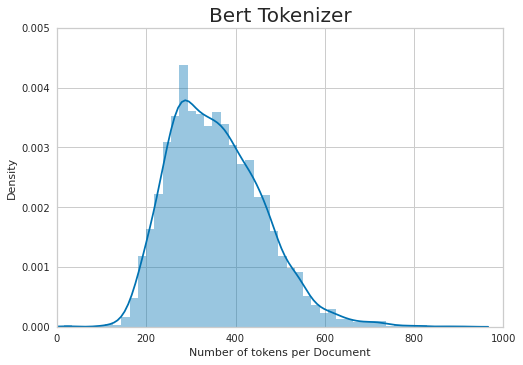

In [83]:
sns.distplot(doc_lengths)
plt.title('Bert Tokenizer', fontsize=20)
plt.ylabel('Density')
plt.xlim(0,1000)
plt.ylim(0,0.005)
plt.xlabel('Number of tokens per Document')
plt.savefig('bert.pdf');

### Scibert

In [84]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('./scibert_scivocab_uncased', do_lower_case=True)

In [85]:
tokenized_docs = []
for doc in x_train_df['Document']:
    marked_text = "[CLS] " + doc.fulltext_string + " [SEP]"
    tokenized_docs.append(tokenizer.tokenize(marked_text))


indexed_docs = []
for doc in tokenized_docs:
    indexed_docs.append(tokenizer.convert_tokens_to_ids(doc))

In [86]:
doc_lengths = []
for i in indexed_docs:
    doc_lengths.append(len(i))

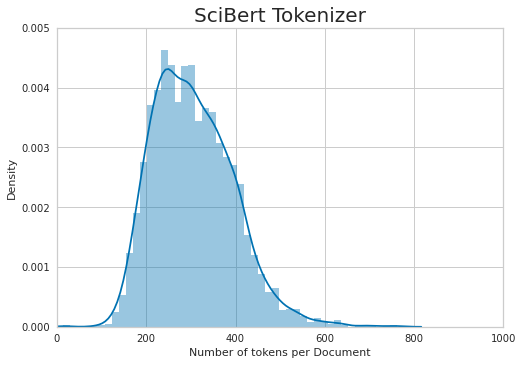

In [87]:
sns.distplot(doc_lengths)
plt.title('SciBert Tokenizer', fontsize=20)
plt.ylabel('Density')
plt.xlim(0,1000)
plt.ylim(0,0.005)
plt.xlabel('Number of tokens per Document')
plt.savefig('scibert.pdf');

## Biobert

In [88]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('biobert_v1.1_pubmed', do_lower_case=True)

In [89]:
tokenized_docs = []
for doc in x_train_df['Document']:
    marked_text = "[CLS] " + doc.fulltext_string + " [SEP]"
    tokenized_docs.append(tokenizer.tokenize(marked_text))


indexed_docs = []
for doc in tokenized_docs:
    indexed_docs.append(tokenizer.convert_tokens_to_ids(doc))

In [90]:
doc_lengths = []
for i in indexed_docs:
    doc_lengths.append(len(i))

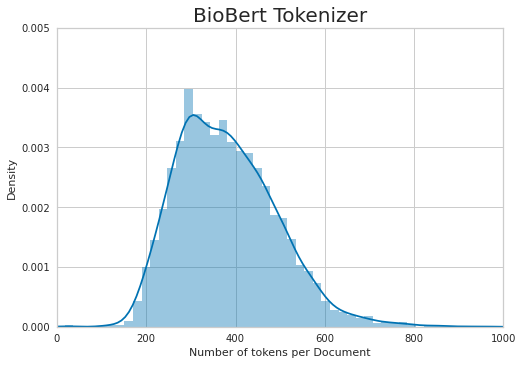

In [91]:
sns.distplot(doc_lengths)
plt.title('BioBert Tokenizer', fontsize=20)
plt.ylabel('Density')
plt.xlim(0,1000)
plt.ylim(0,0.005)

plt.xlabel('Number of tokens per Document')
plt.savefig('biobert.pdf');